Had to flatten the images, since the directory was too deep for transflow

In [ ]:
import sys
sys.setrecursionlimit(10000)  # Increase recursion limit
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
base_dir = 'flattened_images'

# Create an instance of ImageDataGenerator with a validation split
datagen = ImageDataGenerator(
    rescale=1./255,      
    validation_split=0.2   # 20% for validation
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  
    batch_size=32,            
    class_mode='categorical', 
    subset='training',        
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  
    batch_size=32,            
    class_mode='categorical', 
    subset='validation'       
)

for root, dirs, files in os.walk(base_dir):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Found 1588 images belonging to 81 classes.
Found 355 images belonging to 81 classes.
Root: /Users/kaylabiddle/Desktop/PlayingSET/flattened_images
Dirs: ['one_green_oval_empty', 'one_red_oval_full', 'two_red_diamond_empty', 'three_green_squiggle_full', 'two_blue_diamond_full', 'one_blue_oval_empty', 'one_blue_oval_partial', 'three_red_oval_full', 'one_green_diamond_partial', 'three_green_squiggle_empty', 'one_red_squiggle_full', 'two_blue_oval_full', 'one_green_oval_full', 'three_green_diamond_partial', 'three_red_oval_empty', 'two_green_diamond_partial', 'one_red_diamond_partial', 'two_blue_diamond_empty', 'two_red_diamond_full', 'two_red_squiggle_partial', 'one_red_oval_partial', 'three_green_oval_full', 'one_green_squiggle_empty', 'one_green_diamond_empty', 'two_green_squiggle_partial', 'three_blue_diamond_empty', 'one_red_squiggle_empty', 'three_blue_oval_partial', 'two_blue_oval_empty', 'three_red_diamond_full', 'three_green_squiggle_partial', 'three_blue_oval_full', 'two_green_ova

# CNN Model

In [46]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Adjust based on your number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/Caskroom/miniconda/base/envs/UCB/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=500,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/Caskroom/miniconda/base/envs/UCB/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 664ms/step - accuracy: 0.0325 - loss: 4.3768 - val_accuracy: 0.2756 - val_loss: 3.0969
Epoch 2/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1250 - loss: 3.7031 - val_accuracy: 0.0000e+00 - val_loss: 3.4228
Epoch 3/500


2024-10-17 02:32:37.548272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/Caskroom/miniconda/base/envs/UCB/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-17 02:32:37.607694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 650ms/step - accuracy: 0.3701 - loss: 2.4322 - val_accuracy: 0.6080 - val_loss: 1.3147
Epoch 4/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 1.5344 - val_accuracy: 1.0000 - val_loss: 1.2469
Epoch 5/500


2024-10-17 02:33:10.181093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:33:10.219361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 654ms/step - accuracy: 0.6104 - loss: 1.1816 - val_accuracy: 0.7358 - val_loss: 0.7368
Epoch 6/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.4161 - val_accuracy: 0.6667 - val_loss: 1.8521
Epoch 7/500


2024-10-17 02:33:42.990067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:33:43.027495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 655ms/step - accuracy: 0.8083 - loss: 0.5847 - val_accuracy: 0.6165 - val_loss: 1.2482
Epoch 8/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 1.1885 - val_accuracy: 0.3333 - val_loss: 2.6096
Epoch 9/500


2024-10-17 02:34:15.777986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:34:15.848723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 660ms/step - accuracy: 0.8213 - loss: 0.5744 - val_accuracy: 0.8750 - val_loss: 0.3627
Epoch 10/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2967 - val_accuracy: 0.3333 - val_loss: 1.1041
Epoch 11/500


2024-10-17 02:34:48.912081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:34:48.954892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 663ms/step - accuracy: 0.9212 - loss: 0.2928 - val_accuracy: 0.9091 - val_loss: 0.2435
Epoch 12/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0545 - val_accuracy: 1.0000 - val_loss: 0.0334
Epoch 13/500


2024-10-17 02:35:22.062847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:35:22.104427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 678ms/step - accuracy: 0.9699 - loss: 0.1242 - val_accuracy: 0.9347 - val_loss: 0.2111
Epoch 14/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1394 - val_accuracy: 1.0000 - val_loss: 0.0418
Epoch 15/500


2024-10-17 02:35:56.175334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:35:56.225734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 675ms/step - accuracy: 0.9780 - loss: 0.0853 - val_accuracy: 0.9460 - val_loss: 0.2838
Epoch 16/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.2253 - val_accuracy: 0.3333 - val_loss: 1.1196
Epoch 17/500


2024-10-17 02:36:30.096228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:36:30.138973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 626ms/step - accuracy: 0.9939 - loss: 0.0492 - val_accuracy: 0.9631 - val_loss: 0.1245
Epoch 18/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0356 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 19/500


2024-10-17 02:37:01.229703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:37:01.267707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 622ms/step - accuracy: 0.9862 - loss: 0.0618 - val_accuracy: 0.9318 - val_loss: 0.2619
Epoch 20/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 21/500


2024-10-17 02:37:32.380409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:37:32.421482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 616ms/step - accuracy: 0.9796 - loss: 0.0594 - val_accuracy: 0.9716 - val_loss: 0.1109
Epoch 22/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0457 - val_accuracy: 1.0000 - val_loss: 5.2381e-04
Epoch 23/500


2024-10-17 02:38:03.091177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:38:03.171471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 620ms/step - accuracy: 0.9720 - loss: 0.0978 - val_accuracy: 0.9631 - val_loss: 0.1250
Epoch 24/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0500 - val_accuracy: 0.6667 - val_loss: 0.3999
Epoch 25/500


2024-10-17 02:38:34.216585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:38:34.257282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 630ms/step - accuracy: 0.9820 - loss: 0.0665 - val_accuracy: 0.9773 - val_loss: 0.0930
Epoch 26/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0480
Epoch 27/500


2024-10-17 02:39:05.802390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:39:05.837300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 617ms/step - accuracy: 0.9899 - loss: 0.0432 - val_accuracy: 0.9233 - val_loss: 0.2433
Epoch 28/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 29/500


2024-10-17 02:39:36.661729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:39:36.700516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 611ms/step - accuracy: 0.9843 - loss: 0.0409 - val_accuracy: 0.9688 - val_loss: 0.0749
Epoch 30/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 31/500


2024-10-17 02:40:07.235317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:40:07.278331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 604ms/step - accuracy: 0.9913 - loss: 0.0359 - val_accuracy: 0.9744 - val_loss: 0.0592
Epoch 32/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 8.8083e-04 - val_accuracy: 1.0000 - val_loss: 7.2893e-04
Epoch 33/500


2024-10-17 02:40:37.562191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:40:37.601083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 603ms/step - accuracy: 0.9985 - loss: 0.0109 - val_accuracy: 0.9858 - val_loss: 0.0473
Epoch 34/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 1.9709e-05
Epoch 35/500


2024-10-17 02:41:07.959193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:41:08.000640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 602ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9716 - val_loss: 0.0883
Epoch 36/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 1.0632e-04
Epoch 37/500


2024-10-17 02:41:38.194849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:41:38.232481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 631ms/step - accuracy: 0.9838 - loss: 0.0702 - val_accuracy: 0.9631 - val_loss: 0.1514
Epoch 38/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0831 - val_accuracy: 1.0000 - val_loss: 0.2187
Epoch 39/500


2024-10-17 02:42:09.786338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:42:09.823525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - accuracy: 0.9718 - loss: 0.1601 - val_accuracy: 0.9631 - val_loss: 0.1194
Epoch 40/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.1060
Epoch 41/500


2024-10-17 02:42:38.630038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:42:38.673465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9786 - loss: 0.0846 - val_accuracy: 0.9858 - val_loss: 0.0558
Epoch 42/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9688 - loss: 0.0641 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 43/500


2024-10-17 02:43:06.552274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:43:06.585579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9978 - loss: 0.0155 - val_accuracy: 0.9915 - val_loss: 0.0311
Epoch 44/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 45/500


2024-10-17 02:43:34.901009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:43:34.936560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.9982 - loss: 0.0098 - val_accuracy: 0.9886 - val_loss: 0.0214
Epoch 46/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.4177e-04
Epoch 47/500


2024-10-17 02:44:02.223220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:44:02.258162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 545ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9972 - val_loss: 0.0144
Epoch 48/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 1.0000 - loss: 8.7902e-04 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 49/500


2024-10-17 02:44:29.594180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:44:29.627836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9997 - loss: 0.0040 - val_accuracy: 0.9915 - val_loss: 0.0241
Epoch 50/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 51/500


2024-10-17 02:44:57.197238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:44:57.232004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9858 - val_loss: 0.0530
Epoch 52/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.6667 - val_loss: 1.5694
Epoch 53/500


2024-10-17 02:45:25.798617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:45:25.838602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 570ms/step - accuracy: 0.9984 - loss: 0.0120 - val_accuracy: 0.9972 - val_loss: 0.0164
Epoch 54/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6667 - val_loss: 0.3623
Epoch 55/500


2024-10-17 02:45:54.391554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:45:54.425333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 0.9996 - loss: 0.0053 - val_accuracy: 0.9886 - val_loss: 0.0286
Epoch 56/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 1.0000 - loss: 9.1877e-04 - val_accuracy: 1.0000 - val_loss: 6.4770e-06
Epoch 57/500


2024-10-17 02:46:22.539709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:46:22.574628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9993 - loss: 0.0047 - val_accuracy: 0.9886 - val_loss: 0.0486
Epoch 58/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 1.0000 - loss: 3.8826e-04 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 59/500


2024-10-17 02:46:50.546550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:46:50.582310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9706 - loss: 0.1461 - val_accuracy: 0.9688 - val_loss: 0.0955
Epoch 60/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9688 - loss: 0.0479 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 61/500


2024-10-17 02:47:18.497301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:47:18.525762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.8950 - loss: 0.4800 - val_accuracy: 0.9659 - val_loss: 0.0947
Epoch 62/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 63/500


2024-10-17 02:47:46.786016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:47:46.824449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 574ms/step - accuracy: 0.9947 - loss: 0.0247 - val_accuracy: 0.9886 - val_loss: 0.0491
Epoch 64/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0679
Epoch 65/500


2024-10-17 02:48:15.612092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:48:15.662552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9962 - loss: 0.0191 - val_accuracy: 0.9830 - val_loss: 0.0451
Epoch 66/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 1.0000 - loss: 3.7584e-04 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 67/500


2024-10-17 02:48:44.074209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:48:44.109313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 0.9961 - loss: 0.0114 - val_accuracy: 0.9915 - val_loss: 0.0385
Epoch 68/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.6667 - val_loss: 0.8056
Epoch 69/500


2024-10-17 02:49:12.350740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:49:12.387189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9998 - loss: 0.0037 - val_accuracy: 0.9943 - val_loss: 0.0084
Epoch 70/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 1.0000 - loss: 1.2231e-04 - val_accuracy: 1.0000 - val_loss: 0.0662
Epoch 71/500


2024-10-17 02:49:40.275638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:49:40.309935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 563ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9972 - val_loss: 0.0164
Epoch 72/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.3953e-04 - val_accuracy: 1.0000 - val_loss: 2.0985e-04
Epoch 73/500


2024-10-17 02:50:08.332358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:50:08.368896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9943 - val_loss: 0.0118
Epoch 74/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 1.0000 - loss: 3.9669e-04 - val_accuracy: 1.0000 - val_loss: 5.6188e-04
Epoch 75/500


2024-10-17 02:50:35.664330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:50:35.694597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 572ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9943 - val_loss: 0.0129
Epoch 76/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.5844e-04 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 77/500


2024-10-17 02:51:04.347258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:51:04.383256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 594ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9943 - val_loss: 0.0123
Epoch 78/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.5823e-04 - val_accuracy: 1.0000 - val_loss: 7.3717e-04
Epoch 79/500


2024-10-17 02:51:34.085887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:51:34.123124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 588ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9972 - val_loss: 0.0068
Epoch 80/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.4903e-04 - val_accuracy: 0.6667 - val_loss: 0.4480
Epoch 81/500


2024-10-17 02:52:03.568525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:52:03.607928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0081
Epoch 82/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 1.0000 - loss: 4.6694e-04 - val_accuracy: 1.0000 - val_loss: 2.5428e-04
Epoch 83/500


2024-10-17 02:52:32.000643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:52:32.036664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9943 - val_loss: 0.0096
Epoch 84/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 1.0000 - loss: 2.6841e-04 - val_accuracy: 1.0000 - val_loss: 9.6751e-04
Epoch 85/500


2024-10-17 02:52:59.287418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:52:59.321184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 543ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0089
Epoch 86/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 1.0000 - loss: 4.8286e-04 - val_accuracy: 1.0000 - val_loss: 3.4537e-04
Epoch 87/500


2024-10-17 02:53:26.549476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:53:26.584844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9972 - val_loss: 0.0074
Epoch 88/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9688 - loss: 0.1293 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 89/500


2024-10-17 02:53:54.311158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:53:54.336801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 576ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0094
Epoch 90/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.6935e-04 - val_accuracy: 1.0000 - val_loss: 4.4151e-04
Epoch 91/500


2024-10-17 02:54:23.137932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:54:23.176321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9998 - loss: 9.3564e-04 - val_accuracy: 0.9943 - val_loss: 0.0087
Epoch 92/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.6526e-04 - val_accuracy: 1.0000 - val_loss: 8.6037e-04
Epoch 93/500


2024-10-17 02:54:50.992467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:54:51.028914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9999 - loss: 6.6710e-04 - val_accuracy: 0.9943 - val_loss: 0.0083
Epoch 94/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 1.0000 - loss: 2.7056e-04 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 95/500


2024-10-17 02:55:18.699096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:55:18.732952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 573ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0096
Epoch 96/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.4768e-04 - val_accuracy: 1.0000 - val_loss: 0.0447
Epoch 97/500


2024-10-17 02:55:47.432723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:55:47.472393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9972 - val_loss: 0.0076
Epoch 98/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.1197e-04 - val_accuracy: 1.0000 - val_loss: 3.3382e-04
Epoch 99/500


2024-10-17 02:56:16.153769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:56:16.195339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 582ms/step - accuracy: 0.9998 - loss: 9.5900e-04 - val_accuracy: 0.9943 - val_loss: 0.0088
Epoch 100/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.6387e-04 - val_accuracy: 1.0000 - val_loss: 2.3205e-04
Epoch 101/500


2024-10-17 02:56:45.388186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:56:45.425363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 580ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9943 - val_loss: 0.0079
Epoch 102/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.2743e-04 - val_accuracy: 1.0000 - val_loss: 9.3888e-04
Epoch 103/500


2024-10-17 02:57:14.432088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:57:14.472554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - accuracy: 0.9998 - loss: 8.0410e-04 - val_accuracy: 0.9972 - val_loss: 0.0082
Epoch 104/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 1.0000 - loss: 4.0994e-04 - val_accuracy: 1.0000 - val_loss: 1.9966e-04
Epoch 105/500


2024-10-17 02:57:43.256012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:57:43.290669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9972 - val_loss: 0.0092
Epoch 106/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 1.0000 - loss: 3.4549e-04 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 107/500


2024-10-17 02:58:11.686860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:58:11.722352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 1.0000 - loss: 6.1309e-04 - val_accuracy: 0.9972 - val_loss: 0.0064
Epoch 108/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.9688 - loss: 0.1302 - val_accuracy: 1.0000 - val_loss: 2.5913e-04
Epoch 109/500


2024-10-17 02:58:39.747083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:58:39.779796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 1.0000 - loss: 6.2798e-04 - val_accuracy: 0.9972 - val_loss: 0.0094
Epoch 110/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 1.0000 - loss: 2.8279e-04 - val_accuracy: 1.0000 - val_loss: 8.8332e-04
Epoch 111/500


2024-10-17 02:59:07.424246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:59:07.457888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.9969 - loss: 0.0113 - val_accuracy: 0.9972 - val_loss: 0.0071
Epoch 112/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.8664e-05 - val_accuracy: 1.0000 - val_loss: 2.2212e-05
Epoch 113/500


2024-10-17 02:59:35.657702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 02:59:35.693690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9943 - val_loss: 0.0096
Epoch 114/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 1.0000 - loss: 3.1073e-04 - val_accuracy: 1.0000 - val_loss: 4.0649e-05
Epoch 115/500


2024-10-17 03:00:04.187363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:00:04.220520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 570ms/step - accuracy: 0.9997 - loss: 8.9732e-04 - val_accuracy: 0.9943 - val_loss: 0.0091
Epoch 116/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.7573e-05 - val_accuracy: 1.0000 - val_loss: 1.7011e-04
Epoch 117/500


2024-10-17 03:00:32.747581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:00:32.783617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9972 - val_loss: 0.0074
Epoch 118/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.2296e-04 - val_accuracy: 1.0000 - val_loss: 6.4305e-04
Epoch 119/500


2024-10-17 03:01:01.692135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:01:01.728237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9972 - val_loss: 0.0079
Epoch 120/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.0482e-04 - val_accuracy: 1.0000 - val_loss: 6.1194e-06
Epoch 121/500


2024-10-17 03:01:30.335076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:01:30.370410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9987 - loss: 0.0034 - val_accuracy: 0.9972 - val_loss: 0.0076
Epoch 122/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.2059e-04 - val_accuracy: 1.0000 - val_loss: 1.3113e-05
Epoch 123/500


2024-10-17 03:01:58.814841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:01:58.854034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9998 - loss: 3.9751e-04 - val_accuracy: 0.9972 - val_loss: 0.0069
Epoch 124/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 1.0000 - loss: 1.4342e-04 - val_accuracy: 1.0000 - val_loss: 6.9396e-04
Epoch 125/500


2024-10-17 03:02:27.397472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:02:27.433339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9999 - loss: 5.0482e-04 - val_accuracy: 0.9943 - val_loss: 0.0100
Epoch 126/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 1.0000 - loss: 3.4024e-04 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 127/500


2024-10-17 03:02:56.001610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:02:56.035518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 0.9980 - loss: 0.0032 - val_accuracy: 0.9972 - val_loss: 0.0068
Epoch 128/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 1.0000 - loss: 3.7766e-05 - val_accuracy: 1.0000 - val_loss: 1.7285e-05
Epoch 129/500


2024-10-17 03:03:24.322447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:03:24.357000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9989 - loss: 0.0023 - val_accuracy: 0.9972 - val_loss: 0.0081
Epoch 130/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 1.0000 - loss: 2.4269e-04 - val_accuracy: 1.0000 - val_loss: 8.5862e-04
Epoch 131/500


2024-10-17 03:03:52.938447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:03:52.972139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 572ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9972 - val_loss: 0.0094
Epoch 132/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 1.0000 - loss: 1.9181e-04 - val_accuracy: 1.0000 - val_loss: 5.4992e-05
Epoch 133/500


2024-10-17 03:04:21.556265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:04:21.590556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9972 - val_loss: 0.0070
Epoch 134/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 1.0000 - loss: 1.9110e-04 - val_accuracy: 1.0000 - val_loss: 0.1494
Epoch 135/500


2024-10-17 03:04:50.444442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:04:50.477325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 0.9999 - loss: 5.0433e-04 - val_accuracy: 0.9943 - val_loss: 0.0121
Epoch 136/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.4275e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 137/500


2024-10-17 03:05:18.940777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:05:18.984987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9972 - val_loss: 0.0068
Epoch 138/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 1.0000 - loss: 7.8539e-05 - val_accuracy: 1.0000 - val_loss: 5.5233e-06
Epoch 139/500


2024-10-17 03:05:47.196361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:05:47.231512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 583ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 0.9943 - val_loss: 0.0149
Epoch 140/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 1.0000 - loss: 2.9594e-04 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 141/500


2024-10-17 03:06:16.410249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:06:16.443407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9972 - val_loss: 0.0148
Epoch 142/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 143/500


2024-10-17 03:06:43.924478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:06:43.959157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 542ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 0.9943 - val_loss: 0.0093
Epoch 144/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 1.0000 - loss: 8.8793e-05 - val_accuracy: 1.0000 - val_loss: 7.1526e-07
Epoch 145/500


2024-10-17 03:07:11.161769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:07:11.195882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9999 - loss: 6.0539e-04 - val_accuracy: 0.9972 - val_loss: 0.0174
Epoch 146/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 1.0000 - loss: 8.6132e-04 - val_accuracy: 1.0000 - val_loss: 9.1041e-04
Epoch 147/500


2024-10-17 03:07:38.790716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:07:38.825958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0140
Epoch 148/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 1.0000 - loss: 5.3585e-04 - val_accuracy: 1.0000 - val_loss: 2.9046e-05
Epoch 149/500


2024-10-17 03:08:06.414638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:08:06.448616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 582ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0142
Epoch 150/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.3462e-04 - val_accuracy: 1.0000 - val_loss: 4.1582e-04
Epoch 151/500


2024-10-17 03:08:35.506393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:08:35.542324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9998 - loss: 8.1037e-04 - val_accuracy: 0.9943 - val_loss: 0.0098
Epoch 152/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 1.0000 - loss: 4.7534e-05 - val_accuracy: 1.0000 - val_loss: 3.2940e-05
Epoch 153/500


2024-10-17 03:09:03.101497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:09:03.133987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - accuracy: 0.9993 - loss: 0.0016 - val_accuracy: 0.9972 - val_loss: 0.0109
Epoch 154/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 1.0000 - loss: 3.9728e-04 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 155/500


2024-10-17 03:09:30.560096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:09:30.594392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.9979 - loss: 0.0032 - val_accuracy: 0.9972 - val_loss: 0.0060
Epoch 156/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.8465e-05 - val_accuracy: 1.0000 - val_loss: 9.0472e-05
Epoch 157/500


2024-10-17 03:09:59.926953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:09:59.963724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 572ms/step - accuracy: 0.9985 - loss: 0.0025 - val_accuracy: 0.9943 - val_loss: 0.0112
Epoch 158/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.4882e-04 - val_accuracy: 1.0000 - val_loss: 1.1802e-05
Epoch 159/500


2024-10-17 03:10:28.650174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:10:28.687095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 573ms/step - accuracy: 0.9999 - loss: 3.7129e-04 - val_accuracy: 0.9943 - val_loss: 0.0103
Epoch 160/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.8748e-05 - val_accuracy: 1.0000 - val_loss: 2.8228e-04
Epoch 161/500


2024-10-17 03:10:57.418428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:10:57.455248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 578ms/step - accuracy: 0.9991 - loss: 0.0015 - val_accuracy: 0.9972 - val_loss: 0.0090
Epoch 162/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 1.0000 - loss: 3.5042e-04 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 163/500


2024-10-17 03:11:26.470113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:11:26.505156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9943 - val_loss: 0.0096
Epoch 164/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 1.0000 - loss: 1.2526e-04 - val_accuracy: 1.0000 - val_loss: 5.9710e-04
Epoch 165/500


2024-10-17 03:11:55.282144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:11:55.317020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 612ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0074
Epoch 166/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.4489e-05 - val_accuracy: 1.0000 - val_loss: 9.9291e-05
Epoch 167/500


2024-10-17 03:12:26.022031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:12:26.064246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 543ms/step - accuracy: 0.9998 - loss: 5.6566e-04 - val_accuracy: 0.9972 - val_loss: 0.0061
Epoch 168/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 1.0000 - loss: 1.0903e-04 - val_accuracy: 1.0000 - val_loss: 8.9009e-06
Epoch 169/500


2024-10-17 03:12:53.332302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:12:53.367845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9999 - loss: 2.9715e-04 - val_accuracy: 0.9943 - val_loss: 0.0077
Epoch 170/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 1.0000 - loss: 1.9147e-04 - val_accuracy: 1.0000 - val_loss: 8.8485e-05
Epoch 171/500


2024-10-17 03:13:21.887204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:13:21.921319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9975 - loss: 0.0022 - val_accuracy: 0.9972 - val_loss: 0.0060
Epoch 172/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 1.0000 - loss: 2.6843e-05 - val_accuracy: 1.0000 - val_loss: 1.0382e-04
Epoch 173/500


2024-10-17 03:13:50.074073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:13:50.109178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 0.9915 - val_loss: 0.0182
Epoch 174/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 1.0000 - loss: 6.6532e-05 - val_accuracy: 1.0000 - val_loss: 1.4702e-06
Epoch 175/500


2024-10-17 03:14:18.668008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:14:18.703701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 582ms/step - accuracy: 0.9957 - loss: 0.0145 - val_accuracy: 0.6136 - val_loss: 2.4832
Epoch 176/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.6562 - loss: 2.5089 - val_accuracy: 0.3333 - val_loss: 2.5596
Epoch 177/500


2024-10-17 03:14:47.858049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:14:47.891734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 573ms/step - accuracy: 0.7422 - loss: 1.1632 - val_accuracy: 0.9403 - val_loss: 0.3987
Epoch 178/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 1.0000 - loss: 0.0723 - val_accuracy: 1.0000 - val_loss: 0.0491
Epoch 179/500


2024-10-17 03:15:16.615176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:15:16.650388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 598ms/step - accuracy: 0.9596 - loss: 0.2238 - val_accuracy: 0.9801 - val_loss: 0.2758
Epoch 180/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 2.6739e-04
Epoch 181/500


2024-10-17 03:15:46.488724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:15:46.522718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9926 - loss: 0.0554 - val_accuracy: 0.9972 - val_loss: 0.0166
Epoch 182/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 1.6757e-04
Epoch 183/500


2024-10-17 03:16:14.968495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:16:15.003020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9987 - loss: 0.0090 - val_accuracy: 0.9943 - val_loss: 0.0173
Epoch 184/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.3841e-05
Epoch 185/500


2024-10-17 03:16:42.894633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:16:42.932988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 605ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9972 - val_loss: 0.0113
Epoch 186/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.2564e-04 - val_accuracy: 1.0000 - val_loss: 0.1393
Epoch 187/500


2024-10-17 03:17:13.199551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:17:13.236025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 590ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 0.9943 - val_loss: 0.0170
Epoch 188/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 1.0000 - loss: 5.9768e-04 - val_accuracy: 1.0000 - val_loss: 1.9759e-04
Epoch 189/500


2024-10-17 03:17:42.771516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:17:42.805403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 1.0000 - loss: 8.7510e-04 - val_accuracy: 0.9943 - val_loss: 0.0092
Epoch 190/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 1.0000 - loss: 2.9992e-04 - val_accuracy: 1.0000 - val_loss: 1.3709e-05
Epoch 191/500


2024-10-17 03:18:11.060862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:18:11.095942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0117
Epoch 192/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 1.0000 - loss: 1.7390e-04 - val_accuracy: 1.0000 - val_loss: 0.0309
Epoch 193/500


2024-10-17 03:18:38.892580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:18:38.926146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9972 - val_loss: 0.0093
Epoch 194/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 1.0000 - loss: 1.1331e-04 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 195/500


2024-10-17 03:19:06.973045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:19:07.007492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 583ms/step - accuracy: 0.9999 - loss: 5.2158e-04 - val_accuracy: 0.9943 - val_loss: 0.0102
Epoch 196/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 1.0000 - loss: 1.3941e-04 - val_accuracy: 1.0000 - val_loss: 7.9079e-04
Epoch 197/500


2024-10-17 03:19:36.220272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:19:36.255335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9972 - val_loss: 0.0102
Epoch 198/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 1.2318e-05
Epoch 199/500


2024-10-17 03:20:04.138473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:20:04.180521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9990 - loss: 0.0016 - val_accuracy: 0.9943 - val_loss: 0.0103
Epoch 200/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 1.0000 - loss: 8.8684e-05 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 201/500


2024-10-17 03:20:32.089443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:20:32.122207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9972 - val_loss: 0.0096
Epoch 202/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 1.0000 - loss: 4.5768e-04 - val_accuracy: 1.0000 - val_loss: 1.1729e-04
Epoch 203/500


2024-10-17 03:21:00.084056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:21:00.116512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9999 - loss: 5.0910e-04 - val_accuracy: 0.9943 - val_loss: 0.0098
Epoch 204/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 1.0000 - loss: 1.0065e-04 - val_accuracy: 1.0000 - val_loss: 8.3679e-04
Epoch 205/500


2024-10-17 03:21:27.890047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:21:27.923430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9999 - loss: 6.5614e-04 - val_accuracy: 0.9972 - val_loss: 0.0106
Epoch 206/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 1.0000 - loss: 2.6549e-04 - val_accuracy: 1.0000 - val_loss: 6.3578e-07
Epoch 207/500


2024-10-17 03:21:55.822800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:21:55.856946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.9986 - loss: 0.0024 - val_accuracy: 0.9943 - val_loss: 0.0112
Epoch 208/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 1.0000 - loss: 7.3529e-04 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 209/500


2024-10-17 03:22:23.554911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:22:23.589386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9943 - val_loss: 0.0130
Epoch 210/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.0851e-04 - val_accuracy: 1.0000 - val_loss: 6.6472e-05
Epoch 211/500


2024-10-17 03:22:51.573277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:22:51.611735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9998 - loss: 8.4048e-04 - val_accuracy: 0.9972 - val_loss: 0.0088
Epoch 212/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 1.0000 - loss: 1.5144e-04 - val_accuracy: 1.0000 - val_loss: 5.8567e-05
Epoch 213/500


2024-10-17 03:23:19.785189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:23:19.819827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9999 - loss: 7.4113e-04 - val_accuracy: 0.9943 - val_loss: 0.0099
Epoch 214/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 1.0000 - loss: 4.2067e-04 - val_accuracy: 1.0000 - val_loss: 2.2570e-05
Epoch 215/500


2024-10-17 03:23:47.763401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:23:47.798484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0125
Epoch 216/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 1.0000 - loss: 7.7484e-04 - val_accuracy: 1.0000 - val_loss: 8.9406e-06
Epoch 217/500


2024-10-17 03:24:15.843528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:24:15.878919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9979 - loss: 0.0030 - val_accuracy: 0.9943 - val_loss: 0.0099
Epoch 218/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 1.0000 - loss: 2.7759e-04 - val_accuracy: 1.0000 - val_loss: 5.1225e-04
Epoch 219/500


2024-10-17 03:24:43.713132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:24:43.747077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - accuracy: 0.9999 - loss: 3.3036e-04 - val_accuracy: 0.9943 - val_loss: 0.0105
Epoch 220/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.0320e-05 - val_accuracy: 1.0000 - val_loss: 1.3351e-05
Epoch 221/500


2024-10-17 03:25:11.183225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:25:11.220076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9995 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0107
Epoch 222/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 1.0000 - loss: 3.0103e-04 - val_accuracy: 1.0000 - val_loss: 3.2344e-05
Epoch 223/500


2024-10-17 03:25:39.136923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:25:39.170691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9993 - loss: 0.0011 - val_accuracy: 0.9972 - val_loss: 0.0102
Epoch 224/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 1.0000 - loss: 1.0018e-04 - val_accuracy: 1.0000 - val_loss: 8.1013e-05
Epoch 225/500


2024-10-17 03:26:06.806083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:26:06.840311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0102
Epoch 226/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 1.0000 - loss: 1.3245e-04 - val_accuracy: 1.0000 - val_loss: 3.2969e-04
Epoch 227/500


2024-10-17 03:26:34.294224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:26:34.326784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9975 - loss: 0.0026 - val_accuracy: 0.9943 - val_loss: 0.0102
Epoch 228/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 1.0000 - loss: 7.1675e-05 - val_accuracy: 1.0000 - val_loss: 2.5792e-04
Epoch 229/500


2024-10-17 03:27:02.237370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:27:02.270532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9997 - loss: 5.8776e-04 - val_accuracy: 0.9972 - val_loss: 0.0101
Epoch 230/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 1.0000 - loss: 7.7616e-04 - val_accuracy: 1.0000 - val_loss: 5.0752e-04
Epoch 231/500


2024-10-17 03:27:29.783123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:27:29.818224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 539ms/step - accuracy: 0.9999 - loss: 3.6857e-04 - val_accuracy: 0.9943 - val_loss: 0.0105
Epoch 232/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 1.0000 - loss: 4.3528e-05 - val_accuracy: 1.0000 - val_loss: 1.3294e-04
Epoch 233/500


2024-10-17 03:27:56.846212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:27:56.878673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9943 - val_loss: 0.0105
Epoch 234/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 1.0000 - loss: 1.2382e-04 - val_accuracy: 1.0000 - val_loss: 2.9187e-04
Epoch 235/500


2024-10-17 03:28:24.526068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:28:24.559050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9943 - val_loss: 0.0105
Epoch 236/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.2314e-04 - val_accuracy: 1.0000 - val_loss: 3.8343e-05
Epoch 237/500


2024-10-17 03:28:52.594362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:28:52.629635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9998 - loss: 7.8777e-04 - val_accuracy: 0.9943 - val_loss: 0.0124
Epoch 238/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.9665e-04 - val_accuracy: 1.0000 - val_loss: 8.7451e-05
Epoch 239/500


2024-10-17 03:29:20.666756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:29:20.702658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 546ms/step - accuracy: 0.9999 - loss: 4.2546e-04 - val_accuracy: 0.9943 - val_loss: 0.0132
Epoch 240/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 1.0000 - loss: 9.7237e-05 - val_accuracy: 1.0000 - val_loss: 3.0755e-05
Epoch 241/500


2024-10-17 03:29:48.069544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:29:48.103063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - accuracy: 0.9986 - loss: 0.0019 - val_accuracy: 0.9943 - val_loss: 0.0105
Epoch 242/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 1.0000 - loss: 1.4010e-04 - val_accuracy: 1.0000 - val_loss: 2.9801e-05
Epoch 243/500


2024-10-17 03:30:15.505528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:30:15.538415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 0.9943 - val_loss: 0.0103
Epoch 244/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.7816e-05 - val_accuracy: 1.0000 - val_loss: 4.5894e-05
Epoch 245/500


2024-10-17 03:30:43.141820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:30:43.177146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.9943 - val_loss: 0.0103
Epoch 246/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 1.0000 - loss: 1.4450e-05 - val_accuracy: 1.0000 - val_loss: 5.4514e-04
Epoch 247/500


2024-10-17 03:31:10.788754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:31:10.823885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9985 - loss: 0.0020 - val_accuracy: 0.9943 - val_loss: 0.0090
Epoch 248/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 1.0000 - loss: 1.8769e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 249/500


2024-10-17 03:31:38.315839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:31:38.343958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0092
Epoch 250/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 1.0000 - loss: 9.5351e-05 - val_accuracy: 1.0000 - val_loss: 2.3682e-05
Epoch 251/500


2024-10-17 03:32:06.180666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:32:06.214522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9987 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 252/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 1.0000 - loss: 2.9461e-05 - val_accuracy: 0.3333 - val_loss: 0.9064
Epoch 253/500


2024-10-17 03:32:34.164165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:32:34.198913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 1.0000 - loss: 6.8663e-04 - val_accuracy: 0.9972 - val_loss: 0.0081
Epoch 254/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 1.0000 - loss: 6.3551e-05 - val_accuracy: 1.0000 - val_loss: 5.1296e-05
Epoch 255/500


2024-10-17 03:33:02.094797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:33:02.129141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9986 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0101
Epoch 256/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 1.0000 - loss: 3.3359e-04 - val_accuracy: 1.0000 - val_loss: 1.1502e-04
Epoch 257/500


2024-10-17 03:33:29.819594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:33:29.852295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9993 - loss: 8.7892e-04 - val_accuracy: 0.9943 - val_loss: 0.0093
Epoch 258/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 1.0000 - loss: 1.0842e-04 - val_accuracy: 1.0000 - val_loss: 6.8423e-05
Epoch 259/500


2024-10-17 03:33:57.443704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:33:57.477279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9978 - loss: 0.0038 - val_accuracy: 0.9943 - val_loss: 0.0091
Epoch 260/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.3906e-05 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 261/500


2024-10-17 03:34:25.179314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:34:25.216079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9991 - loss: 8.4652e-04 - val_accuracy: 0.9943 - val_loss: 0.0091
Epoch 262/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.0126e-04 - val_accuracy: 1.0000 - val_loss: 8.5432e-06
Epoch 263/500


2024-10-17 03:34:52.655177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:34:52.692375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9989 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0092
Epoch 264/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 1.0000 - loss: 1.2004e-04 - val_accuracy: 1.0000 - val_loss: 1.6694e-04
Epoch 265/500


2024-10-17 03:35:20.225552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:35:20.260030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9994 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0086
Epoch 266/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 1.0000 - loss: 3.1144e-05 - val_accuracy: 1.0000 - val_loss: 4.8875e-06
Epoch 267/500


2024-10-17 03:35:48.280965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:35:48.316482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9997 - loss: 8.3429e-04 - val_accuracy: 0.9943 - val_loss: 0.0089
Epoch 268/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 1.0000 - loss: 3.8243e-05 - val_accuracy: 1.0000 - val_loss: 8.5432e-06
Epoch 269/500


2024-10-17 03:36:16.234561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:36:16.268306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9997 - loss: 8.6368e-04 - val_accuracy: 0.9972 - val_loss: 0.0081
Epoch 270/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 1.0000 - loss: 1.0837e-04 - val_accuracy: 1.0000 - val_loss: 9.2176e-05
Epoch 271/500


2024-10-17 03:36:44.044913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:36:44.078926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0124
Epoch 272/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 1.0000 - loss: 6.7905e-05 - val_accuracy: 1.0000 - val_loss: 6.4486e-05
Epoch 273/500


2024-10-17 03:37:11.940987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:37:11.976001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9993 - loss: 9.3463e-04 - val_accuracy: 0.9943 - val_loss: 0.0084
Epoch 274/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 1.0000 - loss: 1.0021e-04 - val_accuracy: 1.0000 - val_loss: 8.9756e-05
Epoch 275/500


2024-10-17 03:37:40.387888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:37:40.422139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9972 - loss: 0.0022 - val_accuracy: 0.9943 - val_loss: 0.0089
Epoch 276/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 1.0000 - loss: 6.7566e-05 - val_accuracy: 1.0000 - val_loss: 6.7548e-05
Epoch 277/500


2024-10-17 03:38:08.000443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:38:08.033916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9972 - val_loss: 0.0079
Epoch 278/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 1.0000 - loss: 2.3888e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 279/500


2024-10-17 03:38:35.596431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:38:35.629920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 545ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9943 - val_loss: 0.0138
Epoch 280/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.4089e-05 - val_accuracy: 1.0000 - val_loss: 1.3035e-04
Epoch 281/500


2024-10-17 03:39:02.967526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:39:03.002903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9943 - val_loss: 0.0150
Epoch 282/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 1.0000 - loss: 4.7597e-04 - val_accuracy: 1.0000 - val_loss: 3.5763e-06
Epoch 283/500


2024-10-17 03:39:30.986655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:39:31.021942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.9978 - loss: 0.0032 - val_accuracy: 0.9972 - val_loss: 0.0064
Epoch 284/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 1.0000 - loss: 2.0490e-04 - val_accuracy: 1.0000 - val_loss: 7.2717e-06
Epoch 285/500


2024-10-17 03:39:58.316211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:39:58.347610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9943 - val_loss: 0.0117
Epoch 286/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 1.0000 - loss: 3.8901e-05 - val_accuracy: 1.0000 - val_loss: 1.8358e-05
Epoch 287/500


2024-10-17 03:40:26.064405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:40:26.097601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9972 - val_loss: 0.0078
Epoch 288/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.1248e-04 - val_accuracy: 1.0000 - val_loss: 1.9868e-07
Epoch 289/500


2024-10-17 03:40:53.927876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:40:53.963944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9972 - val_loss: 0.0080
Epoch 290/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 1.0000 - loss: 6.7123e-05 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 291/500


2024-10-17 03:41:22.093548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:41:22.128610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9999 - loss: 4.2594e-04 - val_accuracy: 0.9943 - val_loss: 0.0090
Epoch 292/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.5868e-05 - val_accuracy: 1.0000 - val_loss: 2.1775e-05
Epoch 293/500


2024-10-17 03:41:49.669807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:41:49.708190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9943 - val_loss: 0.0087
Epoch 294/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 1.0000 - loss: 3.2042e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 295/500


2024-10-17 03:42:17.373848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:42:17.407251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9999 - loss: 3.3074e-04 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 296/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 1.0000 - loss: 8.0709e-05 - val_accuracy: 0.6667 - val_loss: 0.7075
Epoch 297/500


2024-10-17 03:42:45.404148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:42:45.439733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0096
Epoch 298/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 1.0000 - loss: 4.0951e-04 - val_accuracy: 1.0000 - val_loss: 3.5763e-07
Epoch 299/500


2024-10-17 03:43:13.271939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:43:13.304770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9999 - loss: 1.6184e-04 - val_accuracy: 0.9943 - val_loss: 0.0095
Epoch 300/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 1.0000 - loss: 1.1268e-04 - val_accuracy: 1.0000 - val_loss: 1.1524e-06
Epoch 301/500


2024-10-17 03:43:40.785162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:43:40.818787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 559ms/step - accuracy: 0.9986 - loss: 0.0031 - val_accuracy: 0.9943 - val_loss: 0.0083
Epoch 302/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 1.0000 - loss: 2.2365e-05 - val_accuracy: 1.0000 - val_loss: 1.1633e-04
Epoch 303/500


2024-10-17 03:44:08.839485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:44:08.871689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9999 - loss: 2.3213e-04 - val_accuracy: 0.9943 - val_loss: 0.0087
Epoch 304/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 1.0000 - loss: 1.6156e-05 - val_accuracy: 1.0000 - val_loss: 5.2054e-06
Epoch 305/500


2024-10-17 03:44:36.852725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:44:36.886951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0099
Epoch 306/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 1.0000 - loss: 5.2203e-05 - val_accuracy: 1.0000 - val_loss: 2.5125e-04
Epoch 307/500


2024-10-17 03:45:04.858525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:45:04.891371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 560ms/step - accuracy: 1.0000 - loss: 4.8236e-05 - val_accuracy: 0.9943 - val_loss: 0.0100
Epoch 308/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.9688 - loss: 0.0341 - val_accuracy: 1.0000 - val_loss: 1.3908e-06
Epoch 309/500


2024-10-17 03:45:33.009976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:45:33.041152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - accuracy: 0.9998 - loss: 8.4299e-04 - val_accuracy: 0.9972 - val_loss: 0.0085
Epoch 310/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 1.0000 - loss: 5.0053e-05 - val_accuracy: 1.0000 - val_loss: 5.3004e-05
Epoch 311/500


2024-10-17 03:46:00.688167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:46:00.722598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 1.0000 - loss: 1.1835e-04 - val_accuracy: 0.9943 - val_loss: 0.0080
Epoch 312/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.9688 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 3.7352e-06
Epoch 313/500


2024-10-17 03:46:28.896848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:46:28.930839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 560ms/step - accuracy: 0.9998 - loss: 4.7366e-04 - val_accuracy: 0.9943 - val_loss: 0.0083
Epoch 314/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 1.0000 - loss: 8.6051e-05 - val_accuracy: 1.0000 - val_loss: 2.3841e-05
Epoch 315/500


2024-10-17 03:46:57.001203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:46:57.035207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9999 - loss: 4.1190e-04 - val_accuracy: 0.9943 - val_loss: 0.0086
Epoch 316/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 1.0000 - loss: 2.9304e-05 - val_accuracy: 1.0000 - val_loss: 1.5497e-06
Epoch 317/500


2024-10-17 03:47:25.164369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:47:25.198670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9983 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0089
Epoch 318/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 1.0000 - loss: 7.0191e-05 - val_accuracy: 1.0000 - val_loss: 1.4982e-04
Epoch 319/500


2024-10-17 03:47:52.699325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:47:52.732218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9997 - loss: 5.9333e-04 - val_accuracy: 0.9943 - val_loss: 0.0124
Epoch 320/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 1.0000 - loss: 3.5654e-05 - val_accuracy: 1.0000 - val_loss: 6.3109e-04
Epoch 321/500


2024-10-17 03:48:20.714774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:48:20.748402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9999 - loss: 5.5722e-04 - val_accuracy: 0.9972 - val_loss: 0.0080
Epoch 322/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 1.0000 - loss: 2.3396e-05 - val_accuracy: 1.0000 - val_loss: 9.5120e-05
Epoch 323/500


2024-10-17 03:48:48.625777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:48:48.659049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9970 - loss: 0.0026 - val_accuracy: 0.9943 - val_loss: 0.0111
Epoch 324/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.5659e-04 - val_accuracy: 1.0000 - val_loss: 4.0531e-06
Epoch 325/500


2024-10-17 03:49:16.670947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:49:16.709136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9986 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0089
Epoch 326/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 1.0000 - loss: 5.2952e-05 - val_accuracy: 1.0000 - val_loss: 5.5631e-07
Epoch 327/500


2024-10-17 03:49:44.602079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:49:44.635402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9999 - loss: 2.1966e-04 - val_accuracy: 0.9943 - val_loss: 0.0086
Epoch 328/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 1.0000 - loss: 1.7281e-05 - val_accuracy: 1.0000 - val_loss: 3.1789e-07
Epoch 329/500


2024-10-17 03:50:12.758888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:50:12.792483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9972 - val_loss: 0.0077
Epoch 330/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 1.0000 - loss: 6.5374e-05 - val_accuracy: 1.0000 - val_loss: 9.7740e-05
Epoch 331/500


2024-10-17 03:50:41.098240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:50:41.133028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.9994 - loss: 5.8547e-04 - val_accuracy: 0.9943 - val_loss: 0.0094
Epoch 332/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 1.0000 - loss: 8.4115e-06 - val_accuracy: 1.0000 - val_loss: 3.3776e-06
Epoch 333/500


2024-10-17 03:51:09.303548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:51:09.336865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9998 - loss: 3.7878e-04 - val_accuracy: 0.9943 - val_loss: 0.0099
Epoch 334/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 1.0000 - loss: 1.6763e-05 - val_accuracy: 1.0000 - val_loss: 1.0986e-04
Epoch 335/500


2024-10-17 03:51:37.734615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:51:37.767313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9999 - loss: 9.5161e-04 - val_accuracy: 0.9972 - val_loss: 0.0086
Epoch 336/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 1.0000 - loss: 1.4830e-05 - val_accuracy: 1.0000 - val_loss: 1.4844e-04
Epoch 337/500


2024-10-17 03:52:05.318440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:52:05.352427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0100
Epoch 338/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 1.0000 - loss: 1.5236e-05 - val_accuracy: 1.0000 - val_loss: 6.7949e-06
Epoch 339/500


2024-10-17 03:52:33.237445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:52:33.271946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9996 - loss: 6.4553e-04 - val_accuracy: 0.9972 - val_loss: 0.0073
Epoch 340/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 1.0000 - loss: 2.6375e-06 - val_accuracy: 1.0000 - val_loss: 9.7751e-06
Epoch 341/500


2024-10-17 03:53:00.895245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:53:00.929574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 0.9998 - loss: 1.8203e-04 - val_accuracy: 0.9943 - val_loss: 0.0085
Epoch 342/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 1.0000 - loss: 9.6930e-06 - val_accuracy: 1.0000 - val_loss: 1.3113e-06
Epoch 343/500


2024-10-17 03:53:29.013648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:53:29.045525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9991 - loss: 6.5474e-04 - val_accuracy: 0.9943 - val_loss: 0.0119
Epoch 344/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 345/500


2024-10-17 03:53:56.889667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:53:56.926350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0091
Epoch 346/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.0755e-05 - val_accuracy: 1.0000 - val_loss: 5.3474e-04
Epoch 347/500


2024-10-17 03:54:24.803785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:54:24.840790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9986 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0096
Epoch 348/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 1.0000 - loss: 1.1980e-04 - val_accuracy: 1.0000 - val_loss: 3.5763e-07
Epoch 349/500


2024-10-17 03:54:52.427353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:54:52.459833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9997 - loss: 3.8526e-04 - val_accuracy: 0.9943 - val_loss: 0.0092
Epoch 350/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 1.0000 - loss: 7.2827e-06 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 351/500


2024-10-17 03:55:20.494419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:55:20.527622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9998 - loss: 3.9184e-04 - val_accuracy: 0.9943 - val_loss: 0.0198
Epoch 352/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 1.0000 - loss: 1.3799e-04 - val_accuracy: 1.0000 - val_loss: 5.2289e-05
Epoch 353/500


2024-10-17 03:55:48.669958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:55:48.703446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9996 - loss: 7.0440e-04 - val_accuracy: 0.9943 - val_loss: 0.0094
Epoch 354/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 8.3929e-06 - val_accuracy: 1.0000 - val_loss: 1.1126e-06
Epoch 355/500


2024-10-17 03:56:16.710949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:56:16.747102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.9995 - loss: 7.5967e-04 - val_accuracy: 0.9943 - val_loss: 0.0088
Epoch 356/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 1.0000 - loss: 1.1324e-05 - val_accuracy: 1.0000 - val_loss: 1.4742e-05
Epoch 357/500


2024-10-17 03:56:44.545789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:56:44.579682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9988 - loss: 0.0010 - val_accuracy: 0.9943 - val_loss: 0.0093
Epoch 358/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 1.0000 - loss: 1.7117e-05 - val_accuracy: 1.0000 - val_loss: 2.4755e-05
Epoch 359/500


2024-10-17 03:57:12.720383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:57:12.755050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9994 - loss: 4.4259e-04 - val_accuracy: 0.9943 - val_loss: 0.0089
Epoch 360/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 1.0000 - loss: 4.9248e-06 - val_accuracy: 1.0000 - val_loss: 1.2874e-05
Epoch 361/500


2024-10-17 03:57:40.571969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:57:40.604862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9972 - val_loss: 0.0101
Epoch 362/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 1.0000 - loss: 2.5532e-05 - val_accuracy: 1.0000 - val_loss: 8.3714e-05
Epoch 363/500


2024-10-17 03:58:08.444658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:58:08.476224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9998 - loss: 4.5939e-04 - val_accuracy: 0.9972 - val_loss: 0.0146
Epoch 364/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.5299e-05 - val_accuracy: 1.0000 - val_loss: 4.5535e-05
Epoch 365/500


2024-10-17 03:58:36.503482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:58:36.540934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9998 - loss: 1.8783e-04 - val_accuracy: 0.9943 - val_loss: 0.0108
Epoch 366/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.0110e-05 - val_accuracy: 1.0000 - val_loss: 1.5497e-06
Epoch 367/500


2024-10-17 03:59:04.466566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:59:04.510150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9983 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0111
Epoch 368/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 1.0000 - loss: 1.4814e-05 - val_accuracy: 1.0000 - val_loss: 9.2176e-05
Epoch 369/500


2024-10-17 03:59:33.006381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 03:59:33.039783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 1.0000 - loss: 2.0727e-04 - val_accuracy: 0.9943 - val_loss: 0.0144
Epoch 370/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.6497e-05 - val_accuracy: 1.0000 - val_loss: 4.8081e-06
Epoch 371/500


2024-10-17 04:00:01.158346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:00:01.194766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.7869 - val_loss: 1.3936
Epoch 372/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.8125 - loss: 1.1237 - val_accuracy: 1.0000 - val_loss: 1.0819e-04
Epoch 373/500


2024-10-17 04:00:29.190138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:00:29.224856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.7384 - loss: 1.0804 - val_accuracy: 0.8352 - val_loss: 0.8774
Epoch 374/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.8438 - loss: 0.7228 - val_accuracy: 0.6667 - val_loss: 0.4147
Epoch 375/500


2024-10-17 04:00:56.843885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:00:56.879175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9097 - loss: 0.3890 - val_accuracy: 0.9659 - val_loss: 0.1379
Epoch 376/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.9688 - loss: 0.0879 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 377/500


2024-10-17 04:01:24.731824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:01:24.767587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - accuracy: 0.9916 - loss: 0.0298 - val_accuracy: 0.9773 - val_loss: 0.1327
Epoch 378/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 1.0000 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 0.0766
Epoch 379/500


2024-10-17 04:01:53.558941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:01:53.593595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9917 - loss: 0.0545 - val_accuracy: 0.9886 - val_loss: 0.0785
Epoch 380/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 5.0510e-04
Epoch 381/500


2024-10-17 04:02:21.165734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:02:21.200568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.9981 - loss: 0.0043 - val_accuracy: 0.9915 - val_loss: 0.0444
Epoch 382/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 383/500


2024-10-17 04:02:49.399600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:02:49.434931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9915 - val_loss: 0.0495
Epoch 384/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 1.0000 - loss: 1.8431e-04 - val_accuracy: 1.0000 - val_loss: 0.0171
Epoch 385/500


2024-10-17 04:03:17.536365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:03:17.571514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9985 - loss: 0.0027 - val_accuracy: 0.9915 - val_loss: 0.0391
Epoch 386/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.3087e-04 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 387/500


2024-10-17 04:03:46.153406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:03:46.189456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9915 - val_loss: 0.0425
Epoch 388/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.0977e-04 - val_accuracy: 1.0000 - val_loss: 6.3812e-05
Epoch 389/500


2024-10-17 04:04:14.439421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:04:14.475683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9999 - loss: 6.4821e-04 - val_accuracy: 0.9943 - val_loss: 0.0366
Epoch 390/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.7540e-05 - val_accuracy: 1.0000 - val_loss: 1.0729e-06
Epoch 391/500


2024-10-17 04:04:42.344416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:04:42.379824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - accuracy: 1.0000 - loss: 4.7038e-04 - val_accuracy: 0.9915 - val_loss: 0.0402
Epoch 392/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 1.0000 - loss: 2.5167e-04 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 393/500


2024-10-17 04:05:10.051061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:05:10.085107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9992 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0357
Epoch 394/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 1.0000 - loss: 9.5778e-05 - val_accuracy: 1.0000 - val_loss: 2.4044e-04
Epoch 395/500


2024-10-17 04:05:37.669689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:05:37.703813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9998 - loss: 6.7169e-04 - val_accuracy: 0.9943 - val_loss: 0.0350
Epoch 396/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.0622e-04 - val_accuracy: 1.0000 - val_loss: 2.7538e-04
Epoch 397/500


2024-10-17 04:06:05.169890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:06:05.205916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9995 - loss: 9.1835e-04 - val_accuracy: 0.9915 - val_loss: 0.0363
Epoch 398/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 1.0000 - loss: 1.0753e-04 - val_accuracy: 1.0000 - val_loss: 3.2980e-05
Epoch 399/500


2024-10-17 04:06:32.852534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:06:32.887456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9991 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0343
Epoch 400/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.8061e-04 - val_accuracy: 1.0000 - val_loss: 2.8004e-04
Epoch 401/500


2024-10-17 04:07:01.566363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:07:01.611380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 603ms/step - accuracy: 0.9987 - loss: 0.0017 - val_accuracy: 0.9915 - val_loss: 0.0361
Epoch 402/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.1213e-04 - val_accuracy: 1.0000 - val_loss: 6.8247e-04
Epoch 403/500


2024-10-17 04:07:31.893855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:07:31.933283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9992 - loss: 0.0014 - val_accuracy: 0.9915 - val_loss: 0.0352
Epoch 404/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.1865e-04 - val_accuracy: 1.0000 - val_loss: 4.2518e-06
Epoch 405/500


2024-10-17 04:08:00.110867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:08:00.147064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9996 - loss: 9.5254e-04 - val_accuracy: 0.9915 - val_loss: 0.0359
Epoch 406/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 9.8698e-05 - val_accuracy: 1.0000 - val_loss: 5.3322e-05
Epoch 407/500


2024-10-17 04:08:27.883907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:08:27.920335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9943 - val_loss: 0.0331
Epoch 408/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 9.5782e-05 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 409/500


2024-10-17 04:08:55.527068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:08:55.563855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.9983 - loss: 0.0021 - val_accuracy: 0.9915 - val_loss: 0.0333
Epoch 410/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 1.0000 - loss: 2.2730e-05 - val_accuracy: 1.0000 - val_loss: 1.2082e-04
Epoch 411/500


2024-10-17 04:09:23.343791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:09:23.377370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9994 - loss: 0.0013 - val_accuracy: 0.9915 - val_loss: 0.0340
Epoch 412/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 1.0000 - loss: 3.8992e-05 - val_accuracy: 1.0000 - val_loss: 4.2989e-04
Epoch 413/500


2024-10-17 04:09:51.094988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:09:51.130350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - accuracy: 0.9996 - loss: 9.2761e-04 - val_accuracy: 0.9943 - val_loss: 0.0329
Epoch 414/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 1.0000 - loss: 2.9717e-05 - val_accuracy: 1.0000 - val_loss: 2.0895e-04
Epoch 415/500


2024-10-17 04:10:18.769640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:10:18.804917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.9986 - loss: 0.0015 - val_accuracy: 0.9943 - val_loss: 0.0325
Epoch 416/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 1.0000 - loss: 6.9470e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 417/500


2024-10-17 04:10:46.563998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:10:46.597405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9915 - val_loss: 0.0339
Epoch 418/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 1.0000 - loss: 2.1289e-05 - val_accuracy: 1.0000 - val_loss: 1.2318e-06
Epoch 419/500


2024-10-17 04:11:14.512378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:11:14.547484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9915 - val_loss: 0.0323
Epoch 420/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.3401e-05 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 421/500


2024-10-17 04:11:42.376022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:11:42.414917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9981 - loss: 0.0015 - val_accuracy: 0.9943 - val_loss: 0.0315
Epoch 422/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.9688 - loss: 0.0436 - val_accuracy: 1.0000 - val_loss: 3.1969e-04
Epoch 423/500


2024-10-17 04:12:10.102377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:12:10.137573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 541ms/step - accuracy: 0.9988 - loss: 0.0020 - val_accuracy: 0.9943 - val_loss: 0.0330
Epoch 424/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 1.0000 - loss: 3.0182e-05 - val_accuracy: 1.0000 - val_loss: 1.0262e-04
Epoch 425/500


2024-10-17 04:12:37.241826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:12:37.273400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1849s 39s/step - accuracy: 0.9985 - loss: 0.0027 - val_accuracy: 0.9943 - val_loss: 0.0297
Epoch 426/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.9252e-05 - val_accuracy: 1.0000 - val_loss: 0.2289
Epoch 427/500


2024-10-17 04:43:27.705712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 04:43:27.800754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1000s 21s/step - accuracy: 0.9990 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0315
Epoch 428/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.2386e-05 - val_accuracy: 1.0000 - val_loss: 2.8578e-04
Epoch 429/500


2024-10-17 05:00:09.911478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:00:10.014308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1072s 22s/step - accuracy: 0.9998 - loss: 5.9358e-04 - val_accuracy: 0.9943 - val_loss: 0.0304
Epoch 430/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.0142e-05 - val_accuracy: 1.0000 - val_loss: 4.5455e-04
Epoch 431/500


2024-10-17 05:18:04.077473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:18:04.181202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 992s 21s/step - accuracy: 0.9976 - loss: 0.0020 - val_accuracy: 0.9943 - val_loss: 0.0308
Epoch 432/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 5.6409e-05 - val_accuracy: 1.0000 - val_loss: 1.3908e-06
Epoch 433/500


2024-10-17 05:34:37.543342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:34:37.626678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 956s 20s/step - accuracy: 0.9993 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0302
Epoch 434/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 9.0609e-05 - val_accuracy: 1.0000 - val_loss: 4.7045e-05
Epoch 435/500


2024-10-17 05:50:35.386391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:50:35.487421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9996 - loss: 4.6217e-04 - val_accuracy: 0.9943 - val_loss: 0.0286
Epoch 436/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.4028e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 437/500


2024-10-17 05:51:47.923392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:51:48.005501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9943 - val_loss: 0.0285
Epoch 438/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.3796e-05 - val_accuracy: 1.0000 - val_loss: 5.6047e-04
Epoch 439/500


2024-10-17 05:53:00.228354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:53:00.319411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9993 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0298
Epoch 440/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.2917e-05 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 441/500


2024-10-17 05:54:12.305465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:54:12.395400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9999 - loss: 2.6559e-04 - val_accuracy: 0.9943 - val_loss: 0.0287
Epoch 442/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.2475e-05 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 443/500


2024-10-17 05:55:24.907325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:55:24.998920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9998 - loss: 3.2250e-04 - val_accuracy: 0.9972 - val_loss: 0.0213
Epoch 444/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.3546e-05 - val_accuracy: 0.6667 - val_loss: 0.8604
Epoch 445/500


2024-10-17 05:56:37.512872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:56:37.606987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9989 - loss: 9.6419e-04 - val_accuracy: 0.9943 - val_loss: 0.0280
Epoch 446/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 8.4052e-05 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 447/500


2024-10-17 05:57:49.754712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:57:49.853967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9886 - val_loss: 0.0350
Epoch 448/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.0684e-05 - val_accuracy: 1.0000 - val_loss: 3.3615e-05
Epoch 449/500


2024-10-17 05:59:01.755749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 05:59:01.847794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9999 - loss: 5.8966e-04 - val_accuracy: 0.9943 - val_loss: 0.0280
Epoch 450/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.2994e-05 - val_accuracy: 1.0000 - val_loss: 4.1326e-06
Epoch 451/500


2024-10-17 06:00:14.055521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:00:14.147712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9886 - val_loss: 0.0401
Epoch 452/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.5146e-04 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 453/500


2024-10-17 06:01:26.490050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:01:26.582263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9960 - loss: 0.0034 - val_accuracy: 0.9943 - val_loss: 0.0281
Epoch 454/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.1949e-04 - val_accuracy: 1.0000 - val_loss: 1.7913e-04
Epoch 455/500


2024-10-17 06:02:39.104885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:02:39.197494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9988 - loss: 0.0022 - val_accuracy: 0.9943 - val_loss: 0.0264
Epoch 456/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.8487e-05 - val_accuracy: 1.0000 - val_loss: 6.7949e-06
Epoch 457/500


2024-10-17 06:03:51.738474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:03:51.834524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9999 - loss: 3.7407e-04 - val_accuracy: 0.9943 - val_loss: 0.0266
Epoch 458/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 9.9909e-05 - val_accuracy: 1.0000 - val_loss: 1.9283e-04
Epoch 459/500


2024-10-17 06:05:04.266587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:05:04.354854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9993 - loss: 0.0012 - val_accuracy: 0.9943 - val_loss: 0.0274
Epoch 460/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.7505e-05 - val_accuracy: 1.0000 - val_loss: 1.1563e-05
Epoch 461/500


2024-10-17 06:06:16.894424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:06:16.986303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9999 - loss: 8.1426e-04 - val_accuracy: 0.9943 - val_loss: 0.0270
Epoch 462/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.2666e-05 - val_accuracy: 1.0000 - val_loss: 7.2482e-04
Epoch 463/500


2024-10-17 06:07:29.539579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:07:29.636811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9982 - loss: 0.0015 - val_accuracy: 0.9915 - val_loss: 0.0289
Epoch 464/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.3168e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 465/500


2024-10-17 06:08:42.010801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:08:42.099628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9998 - loss: 9.0696e-04 - val_accuracy: 0.9943 - val_loss: 0.0274
Epoch 466/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.2215e-05 - val_accuracy: 1.0000 - val_loss: 9.0504e-04
Epoch 467/500


2024-10-17 06:09:54.704895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:09:54.804710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9994 - loss: 5.0570e-04 - val_accuracy: 0.9943 - val_loss: 0.0265
Epoch 468/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.5786e-05 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 469/500


2024-10-17 06:11:07.221683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:11:07.313085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0263
Epoch 470/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.6547e-05 - val_accuracy: 1.0000 - val_loss: 5.2054e-06
Epoch 471/500


2024-10-17 06:12:20.063546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:12:20.155964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9992 - loss: 6.6495e-04 - val_accuracy: 0.9943 - val_loss: 0.0246
Epoch 472/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.6439e-05 - val_accuracy: 1.0000 - val_loss: 5.9605e-07
Epoch 473/500


2024-10-17 06:13:32.305349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:13:32.402121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 1.0000 - loss: 1.3506e-04 - val_accuracy: 0.9943 - val_loss: 0.0241
Epoch 474/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0319 - val_accuracy: 1.0000 - val_loss: 4.5892e-05
Epoch 475/500


2024-10-17 06:14:45.063245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:14:45.155465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9998 - loss: 9.0485e-04 - val_accuracy: 0.9943 - val_loss: 0.0256
Epoch 476/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.9253e-05 - val_accuracy: 1.0000 - val_loss: 4.1522e-05
Epoch 477/500


2024-10-17 06:15:57.622255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:15:57.728365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9996 - loss: 3.3632e-04 - val_accuracy: 0.9943 - val_loss: 0.0252
Epoch 478/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 9.9276e-06 - val_accuracy: 1.0000 - val_loss: 1.5140e-04
Epoch 479/500


2024-10-17 06:17:09.989950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:17:10.083671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9994 - loss: 4.7625e-04 - val_accuracy: 0.9943 - val_loss: 0.0246
Epoch 480/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.4789e-05 - val_accuracy: 1.0000 - val_loss: 3.1549e-05
Epoch 481/500


2024-10-17 06:18:22.658993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:18:22.760276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0250
Epoch 482/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.0700e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 483/500


2024-10-17 06:19:34.856634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:19:34.949691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9985 - loss: 0.0034 - val_accuracy: 0.9943 - val_loss: 0.0235
Epoch 484/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.7571e-05 - val_accuracy: 1.0000 - val_loss: 7.4307e-06
Epoch 485/500


2024-10-17 06:20:47.739925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:20:47.830827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9985 - loss: 0.0011 - val_accuracy: 0.9943 - val_loss: 0.0241
Epoch 486/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.7164e-05 - val_accuracy: 1.0000 - val_loss: 6.3848e-04
Epoch 487/500


2024-10-17 06:22:00.449709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:22:00.543844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 1.0000 - loss: 2.9247e-04 - val_accuracy: 0.9943 - val_loss: 0.0239
Epoch 488/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.0432e-05 - val_accuracy: 1.0000 - val_loss: 8.3446e-07
Epoch 489/500


2024-10-17 06:23:13.140692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:23:13.234878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9964 - loss: 0.0034 - val_accuracy: 0.9943 - val_loss: 0.0246
Epoch 490/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.3084e-05 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 491/500


2024-10-17 06:24:25.918806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:24:26.011452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9998 - loss: 1.8428e-04 - val_accuracy: 0.9943 - val_loss: 0.0234
Epoch 492/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.6253e-05 - val_accuracy: 1.0000 - val_loss: 2.7564e-04
Epoch 493/500


2024-10-17 06:25:38.789756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:25:38.884158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9997 - loss: 5.0297e-04 - val_accuracy: 0.9943 - val_loss: 0.0225
Epoch 494/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.5690e-05 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 495/500


2024-10-17 06:26:51.351321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:26:51.445878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9999 - loss: 6.5356e-04 - val_accuracy: 0.9943 - val_loss: 0.0223
Epoch 496/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.5840e-06 - val_accuracy: 1.0000 - val_loss: 0.1337
Epoch 497/500


2024-10-17 06:28:04.722578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:28:04.816480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9857 - loss: 0.0601 - val_accuracy: 0.9631 - val_loss: 0.1771
Epoch 498/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 0.1010
Epoch 499/500


2024-10-17 06:29:18.064603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:29:18.160970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9651 - loss: 0.1297 - val_accuracy: 0.9545 - val_loss: 0.1530
Epoch 500/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0383 - val_accuracy: 1.0000 - val_loss: 0.0117


2024-10-17 06:30:31.035096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:30:31.127422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


# MobileNetV2

In [48]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MobileNetV2 model without the top layer and with ImageNet weights
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
base_model_mobilenet.trainable = False

# Create a new model
model_mobilenet = Sequential([
    base_model_mobilenet,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax') 
])

# Compile the model
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=500, 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/var/folders/m9/nwvp3yqj5f76trygypnkypv80000gp/T/ipykernel_36722/3993700659.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1869 - loss: 6.1595 - val_accuracy: 0.6250 - val_loss: 1.2537
Epoch 2/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6562 - loss: 1.2801

2024-10-17 06:32:12.757662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:32:12.997659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6562 - loss: 1.2801 - val_accuracy: 1.0000 - val_loss: 0.2262
Epoch 3/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7251 - loss: 0.9330 - val_accuracy: 0.7898 - val_loss: 0.6456
Epoch 4/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 0.8438 - loss: 0.5735

2024-10-17 06:33:28.275796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:33:28.459828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8438 - loss: 0.5735 - val_accuracy: 1.0000 - val_loss: 0.4500
Epoch 5/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8858 - loss: 0.3398 - val_accuracy: 0.8807 - val_loss: 0.4467
Epoch 6/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 0.9062 - loss: 0.4330

2024-10-17 06:34:43.234191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:34:43.420639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9062 - loss: 0.4330 - val_accuracy: 0.6667 - val_loss: 0.2758
Epoch 7/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9526 - loss: 0.1905 - val_accuracy: 0.9119 - val_loss: 0.2498
Epoch 8/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 1.0000 - loss: 0.0712

2024-10-17 06:35:58.781543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:35:58.965123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 9/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9769 - loss: 0.1022 - val_accuracy: 0.9261 - val_loss: 0.2577
Epoch 10/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9688 - loss: 0.0956

2024-10-17 06:37:13.734877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:37:13.918794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.0956 - val_accuracy: 1.0000 - val_loss: 0.0271
Epoch 11/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9830 - loss: 0.0693 - val_accuracy: 0.9176 - val_loss: 0.2492
Epoch 12/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 0.0268

2024-10-17 06:38:28.575441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:38:28.770102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0639
Epoch 13/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9784 - loss: 0.0650 - val_accuracy: 0.9261 - val_loss: 0.2470
Epoch 14/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 0.0269

2024-10-17 06:39:43.210878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:39:43.393826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 15/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9941 - loss: 0.0306 - val_accuracy: 0.9517 - val_loss: 0.1585
Epoch 16/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9688 - loss: 0.0822

2024-10-17 06:40:57.592060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:40:57.778248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9688 - loss: 0.0822 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 17/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9888 - loss: 0.0290 - val_accuracy: 0.9205 - val_loss: 0.2243
Epoch 18/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 0.0116

2024-10-17 06:42:12.473787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:42:12.655255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 19/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9893 - loss: 0.0470 - val_accuracy: 0.9517 - val_loss: 0.1477
Epoch 20/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 0.9688 - loss: 0.0384

2024-10-17 06:43:27.487124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:43:27.678134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9688 - loss: 0.0384 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 21/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9962 - loss: 0.0171 - val_accuracy: 0.9602 - val_loss: 0.1185
Epoch 22/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:07 1s/step - accuracy: 1.0000 - loss: 0.0109

2024-10-17 06:44:42.331437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:44:42.509923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0201
Epoch 23/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9947 - loss: 0.0245 - val_accuracy: 0.9545 - val_loss: 0.1421
Epoch 24/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9688 - loss: 0.0766

2024-10-17 06:45:57.055658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:45:57.239746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.0766 - val_accuracy: 0.6667 - val_loss: 0.4907
Epoch 25/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9951 - loss: 0.0143 - val_accuracy: 0.9574 - val_loss: 0.1138
Epoch 26/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 1.0000 - loss: 0.0048

2024-10-17 06:47:11.681270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.6667 - val_loss: 0.6035
Epoch 27/500


2024-10-17 06:47:11.946340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9996 - loss: 0.0058 - val_accuracy: 0.9602 - val_loss: 0.1190
Epoch 28/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:09 1s/step - accuracy: 1.0000 - loss: 0.0046

2024-10-17 06:48:26.851210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:48:27.034819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0165
Epoch 29/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9991 - loss: 0.0070 - val_accuracy: 0.9631 - val_loss: 0.1072
Epoch 30/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 1.0000 - loss: 0.0015

2024-10-17 06:49:41.913258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:49:42.099295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 31/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9688 - val_loss: 0.1057
Epoch 32/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 0.0019

2024-10-17 06:50:57.293372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:50:57.474622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 33/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9631 - val_loss: 0.1087
Epoch 34/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:07 1s/step - accuracy: 1.0000 - loss: 0.0046

2024-10-17 06:52:12.098990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:52:12.274070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 2.7043e-04
Epoch 35/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9984 - loss: 0.0036 - val_accuracy: 0.9631 - val_loss: 0.1068
Epoch 36/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 6.4059e-04

2024-10-17 06:53:27.124538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:53:27.306256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 6.4059e-04 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 37/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9688 - val_loss: 0.1032
Epoch 38/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 0.0011

2024-10-17 06:54:42.217465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:54:42.399550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0680
Epoch 39/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9688 - val_loss: 0.1032
Epoch 40/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9688 - loss: 0.0648

2024-10-17 06:55:57.325263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:55:57.506790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0290
Epoch 41/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9990 - loss: 0.0026 - val_accuracy: 0.9688 - val_loss: 0.0999
Epoch 42/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 1.0000 - loss: 0.0012

2024-10-17 06:57:10.427358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 06:57:10.604135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.1445
Epoch 43/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1742s 36s/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9688 - val_loss: 0.1031
Epoch 44/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 45/500


2024-10-17 07:26:13.192437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 07:26:13.253417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9688 - val_loss: 0.1041
Epoch 46/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 1.0000 - loss: 4.5833e-04

2024-10-17 07:27:16.519651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 07:27:16.699956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.5833e-04 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 47/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1050s 22s/step - accuracy: 0.9985 - loss: 0.0022 - val_accuracy: 0.9688 - val_loss: 0.1009
Epoch 48/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 1.0000 - loss: 6.5159e-04

2024-10-17 07:44:47.653984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 07:44:47.828496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 6.5159e-04 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 49/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1059s 22s/step - accuracy: 0.9984 - loss: 0.0033 - val_accuracy: 0.9688 - val_loss: 0.0999
Epoch 50/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:03 1s/step - accuracy: 1.0000 - loss: 5.3718e-04

2024-10-17 08:02:28.207891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:02:28.406025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 5.3718e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 51/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 733ms/step - accuracy: 1.0000 - loss: 9.2753e-04 - val_accuracy: 0.9688 - val_loss: 0.1007
Epoch 52/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0659 - val_accuracy: 1.0000 - val_loss: 0.1136
Epoch 53/500


2024-10-17 08:03:05.767922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:03:05.829408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 525ms/step - accuracy: 0.9980 - loss: 0.0031 - val_accuracy: 0.9688 - val_loss: 0.0989
Epoch 54/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.6433e-04 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 55/500


2024-10-17 08:03:32.026957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:03:32.085340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 526ms/step - accuracy: 0.9994 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.0997
Epoch 56/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.4128e-04 - val_accuracy: 0.6667 - val_loss: 0.2355
Epoch 57/500


2024-10-17 08:03:58.293125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:03:58.350933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 526ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.1009
Epoch 58/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.2145e-04
Epoch 59/500


2024-10-17 08:04:24.579375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:04:24.636211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 617ms/step - accuracy: 0.9998 - loss: 8.1322e-04 - val_accuracy: 0.9688 - val_loss: 0.0998
Epoch 60/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.2206e-04 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 61/500


2024-10-17 08:04:55.224875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:04:55.281068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 530ms/step - accuracy: 0.9984 - loss: 0.0020 - val_accuracy: 0.9659 - val_loss: 0.1032
Epoch 62/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.3469e-04 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 63/500


2024-10-17 08:05:21.699585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:05:21.757411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 525ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9688 - val_loss: 0.0995
Epoch 64/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.3587e-04 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 65/500


2024-10-17 08:05:47.916238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:05:47.975733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 524ms/step - accuracy: 0.9998 - loss: 8.8768e-04 - val_accuracy: 0.9688 - val_loss: 0.0988
Epoch 66/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.4185e-04 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 67/500


2024-10-17 08:06:14.080905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:06:14.136319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 525ms/step - accuracy: 0.9992 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.0993
Epoch 68/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.8042e-04 - val_accuracy: 1.0000 - val_loss: 1.1535e-04
Epoch 69/500


2024-10-17 08:06:40.309842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:06:40.367666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 521ms/step - accuracy: 0.9998 - loss: 9.0371e-04 - val_accuracy: 0.9688 - val_loss: 0.0980
Epoch 70/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9731e-04 - val_accuracy: 1.0000 - val_loss: 0.1822
Epoch 71/500


2024-10-17 08:07:06.333507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:07:06.390220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 524ms/step - accuracy: 0.9999 - loss: 8.3897e-04 - val_accuracy: 0.9659 - val_loss: 0.1011
Epoch 72/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.7752e-04 - val_accuracy: 1.0000 - val_loss: 3.6947e-04
Epoch 73/500


2024-10-17 08:07:32.491139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:07:32.547567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 516ms/step - accuracy: 0.9988 - loss: 0.0022 - val_accuracy: 0.9716 - val_loss: 0.0978
Epoch 74/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.6887e-04 - val_accuracy: 1.0000 - val_loss: 0.0713
Epoch 75/500


2024-10-17 08:07:58.251880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:07:58.308771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 515ms/step - accuracy: 0.9996 - loss: 9.8979e-04 - val_accuracy: 0.9688 - val_loss: 0.0995
Epoch 76/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.6417e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 77/500


2024-10-17 08:08:23.957032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:08:24.010904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 513ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9688 - val_loss: 0.0999
Epoch 78/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.7641e-04 - val_accuracy: 1.0000 - val_loss: 6.0997e-04
Epoch 79/500


2024-10-17 08:08:49.580027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:08:49.636009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 595ms/step - accuracy: 0.9998 - loss: 9.0654e-04 - val_accuracy: 0.9688 - val_loss: 0.0992
Epoch 80/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.2687e-04 - val_accuracy: 1.0000 - val_loss: 0.0750
Epoch 81/500


2024-10-17 08:09:19.238771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:09:19.305993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9659 - val_loss: 0.1020
Epoch 82/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.6164e-04 - val_accuracy: 1.0000 - val_loss: 6.7120e-04
Epoch 83/500


2024-10-17 08:09:46.878630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:09:46.938051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9977 - loss: 0.0024 - val_accuracy: 0.9688 - val_loss: 0.1010
Epoch 84/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.9117e-04 - val_accuracy: 1.0000 - val_loss: 3.9894e-05
Epoch 85/500


2024-10-17 08:10:14.328602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:10:14.386357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 499s 10s/step - accuracy: 0.9998 - loss: 6.0409e-04 - val_accuracy: 0.9659 - val_loss: 0.0990
Epoch 86/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.1299e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 87/500


2024-10-17 08:18:33.998419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:18:34.060834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 926s 19s/step - accuracy: 0.9987 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.0995
Epoch 88/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.4890e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 89/500


2024-10-17 08:34:00.350753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:34:00.408844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9998 - loss: 8.9490e-04 - val_accuracy: 0.9688 - val_loss: 0.0992
Epoch 90/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.3526e-04 - val_accuracy: 1.0000 - val_loss: 0.0444
Epoch 91/500


2024-10-17 08:35:03.166815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:35:03.223699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.9995 - loss: 0.0012 - val_accuracy: 0.9659 - val_loss: 0.0998
Epoch 92/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.4649e-04 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 93/500


2024-10-17 08:37:15.915082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:37:15.969836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 416s 9s/step - accuracy: 0.9991 - loss: 9.8608e-04 - val_accuracy: 0.9688 - val_loss: 0.0985
Epoch 94/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.2868e-04 - val_accuracy: 1.0000 - val_loss: 3.3616e-04
Epoch 95/500


2024-10-17 08:44:12.013452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:44:12.067773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9998 - loss: 6.3522e-04 - val_accuracy: 0.9659 - val_loss: 0.0988
Epoch 96/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.8214e-04 - val_accuracy: 1.0000 - val_loss: 7.4620e-05
Epoch 97/500


2024-10-17 08:45:15.044152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:45:15.098490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9999 - loss: 8.5905e-04 - val_accuracy: 0.9688 - val_loss: 0.1003
Epoch 98/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 1.0000 - loss: 1.7619e-04

2024-10-17 08:47:11.920732: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 08:47:12.096222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.7619e-04 - val_accuracy: 1.0000 - val_loss: 8.6490e-04
Epoch 99/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 868s 18s/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9688 - val_loss: 0.0998
Epoch 100/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 1.0000 - loss: 2.1342e-04

2024-10-17 09:01:41.619981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:01:41.795403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.1342e-04 - val_accuracy: 1.0000 - val_loss: 8.7607e-05
Epoch 101/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9659 - val_loss: 0.0998
Epoch 102/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 1.0000 - loss: 2.0534e-04

2024-10-17 09:03:13.228936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:03:13.405374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.0534e-04 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 103/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 1.0000 - loss: 4.7504e-04 - val_accuracy: 0.9659 - val_loss: 0.0998
Epoch 104/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 5.5108e-04

2024-10-17 09:05:44.815735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 5.5108e-04 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 105/500


2024-10-17 09:05:45.157322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9981 - loss: 0.0016 - val_accuracy: 0.9659 - val_loss: 0.0986
Epoch 106/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 1.0000 - loss: 2.8396e-04

2024-10-17 09:07:05.938405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.8396e-04 - val_accuracy: 1.0000 - val_loss: 0.0735
Epoch 107/500


2024-10-17 09:07:06.172347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 694s 14s/step - accuracy: 0.9993 - loss: 7.7949e-04 - val_accuracy: 0.9659 - val_loss: 0.1002
Epoch 108/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.2163e-04 - val_accuracy: 1.0000 - val_loss: 5.4829e-04
Epoch 109/500


2024-10-17 09:18:41.139923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:18:41.201035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 578ms/step - accuracy: 0.9998 - loss: 3.4040e-04 - val_accuracy: 0.9659 - val_loss: 0.0992
Epoch 110/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.7664e-04 - val_accuracy: 1.0000 - val_loss: 3.5365e-06
Epoch 111/500


2024-10-17 09:19:10.026303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:19:10.087545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 579ms/step - accuracy: 0.9986 - loss: 0.0012 - val_accuracy: 0.9716 - val_loss: 0.0921
Epoch 112/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.8337e-04 - val_accuracy: 0.6667 - val_loss: 0.8276
Epoch 113/500


2024-10-17 09:19:38.930046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:19:38.994951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 594ms/step - accuracy: 0.9988 - loss: 0.0012 - val_accuracy: 0.9659 - val_loss: 0.0996
Epoch 114/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.5409e-04 - val_accuracy: 1.0000 - val_loss: 3.3076e-04
Epoch 115/500


2024-10-17 09:20:08.589519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:20:08.646857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 610ms/step - accuracy: 0.9991 - loss: 9.8816e-04 - val_accuracy: 0.9659 - val_loss: 0.1001
Epoch 116/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.1738e-04 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 117/500


2024-10-17 09:20:38.981906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:20:39.045567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 584ms/step - accuracy: 0.9998 - loss: 7.1408e-04 - val_accuracy: 0.9688 - val_loss: 0.0962
Epoch 118/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.2271e-04 - val_accuracy: 0.6667 - val_loss: 0.3117
Epoch 119/500


2024-10-17 09:21:08.168938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:21:08.230810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9659 - val_loss: 0.1005
Epoch 120/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9293e-04 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 121/500


2024-10-17 09:21:36.082303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:21:36.145217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 584ms/step - accuracy: 0.9989 - loss: 0.0011 - val_accuracy: 0.9659 - val_loss: 0.0991
Epoch 122/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.1279e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 123/500


2024-10-17 09:22:05.314955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:22:05.379525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 582ms/step - accuracy: 0.9989 - loss: 0.0011 - val_accuracy: 0.9659 - val_loss: 0.0983
Epoch 124/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.8951e-04 - val_accuracy: 1.0000 - val_loss: 4.1190e-04
Epoch 125/500


2024-10-17 09:22:34.403177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:22:34.467901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 580ms/step - accuracy: 0.9984 - loss: 0.0015 - val_accuracy: 0.9659 - val_loss: 0.1007
Epoch 126/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.3092e-04 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 127/500


2024-10-17 09:23:03.395866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:23:03.457412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 587ms/step - accuracy: 1.0000 - loss: 2.3443e-04 - val_accuracy: 0.9659 - val_loss: 0.0982
Epoch 128/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.0293e-04 - val_accuracy: 1.0000 - val_loss: 0.0741
Epoch 129/500


2024-10-17 09:23:32.677561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:23:32.741340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 573ms/step - accuracy: 0.9994 - loss: 6.6052e-04 - val_accuracy: 0.9659 - val_loss: 0.0985
Epoch 130/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.0671e-04 - val_accuracy: 1.0000 - val_loss: 4.5695e-05
Epoch 131/500


2024-10-17 09:24:01.274696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:24:01.337121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 1.0000 - loss: 3.9783e-04 - val_accuracy: 0.9631 - val_loss: 0.1013
Epoch 132/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.8950e-04 - val_accuracy: 1.0000 - val_loss: 0.0253
Epoch 133/500


2024-10-17 09:24:29.523089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:24:29.584468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9994 - loss: 0.0012 - val_accuracy: 0.9659 - val_loss: 0.0990
Epoch 134/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.8285e-04 - val_accuracy: 1.0000 - val_loss: 9.8816e-04
Epoch 135/500


2024-10-17 09:24:58.297821: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:24:58.361188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9992 - loss: 7.5392e-04 - val_accuracy: 0.9659 - val_loss: 0.0991
Epoch 136/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.0929e-04 - val_accuracy: 1.0000 - val_loss: 4.7774e-04
Epoch 137/500


2024-10-17 09:25:26.709016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:25:26.777911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 585ms/step - accuracy: 0.9997 - loss: 3.3785e-04 - val_accuracy: 0.9659 - val_loss: 0.0982
Epoch 138/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.9700e-05 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 139/500


2024-10-17 09:25:55.975191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:25:56.036507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 584ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9659 - val_loss: 0.0971
Epoch 140/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.3533e-05 - val_accuracy: 1.0000 - val_loss: 0.1172
Epoch 141/500


2024-10-17 09:26:25.132039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:26:25.202487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 576ms/step - accuracy: 0.9988 - loss: 0.0012 - val_accuracy: 0.9659 - val_loss: 0.0980
Epoch 142/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.3802e-05 - val_accuracy: 1.0000 - val_loss: 4.0892e-04
Epoch 143/500


2024-10-17 09:26:53.877510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:26:53.939314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9659 - val_loss: 0.0985
Epoch 144/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2652e-04 - val_accuracy: 1.0000 - val_loss: 0.0863
Epoch 145/500


2024-10-17 09:27:22.053804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:27:22.115329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.9999 - loss: 3.8672e-04 - val_accuracy: 0.9716 - val_loss: 0.0994
Epoch 146/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.3637e-05 - val_accuracy: 1.0000 - val_loss: 2.3444e-06
Epoch 147/500


2024-10-17 09:27:50.142563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:27:50.204010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9973 - loss: 0.0025 - val_accuracy: 0.9659 - val_loss: 0.1007
Epoch 148/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5478e-05 - val_accuracy: 1.0000 - val_loss: 0.0298
Epoch 149/500


2024-10-17 09:28:17.964391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:28:18.022332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9119 - val_loss: 0.4706
Epoch 150/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.4538 - val_accuracy: 0.6667 - val_loss: 4.1218
Epoch 151/500


2024-10-17 09:28:46.229952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:28:46.287846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 562ms/step - accuracy: 0.7088 - loss: 1.4872 - val_accuracy: 0.4659 - val_loss: 2.0737
Epoch 152/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2812 - loss: 2.8809 - val_accuracy: 0.6667 - val_loss: 1.6768
Epoch 153/500


2024-10-17 09:29:14.304521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:29:14.380825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.5447 - loss: 1.7337 - val_accuracy: 0.6705 - val_loss: 1.0535
Epoch 154/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.7257 - val_accuracy: 0.6667 - val_loss: 1.2323
Epoch 155/500


2024-10-17 09:29:43.580499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:29:43.642943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 581ms/step - accuracy: 0.7258 - loss: 0.8711 - val_accuracy: 0.7557 - val_loss: 0.8079
Epoch 156/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.8369 - val_accuracy: 0.6667 - val_loss: 5.1957
Epoch 157/500


2024-10-17 09:30:12.609562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:30:12.677425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 0.8181 - loss: 0.5417 - val_accuracy: 0.7926 - val_loss: 0.6795
Epoch 158/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.4464 - val_accuracy: 0.6667 - val_loss: 1.7477
Epoch 159/500


2024-10-17 09:30:40.973435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:30:41.036443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 580ms/step - accuracy: 0.8802 - loss: 0.3858 - val_accuracy: 0.8381 - val_loss: 0.5763
Epoch 160/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.2789 - val_accuracy: 1.0000 - val_loss: 1.6705e-04
Epoch 161/500


2024-10-17 09:31:09.931499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:31:09.994329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - accuracy: 0.8824 - loss: 0.3235 - val_accuracy: 0.8807 - val_loss: 0.3752
Epoch 162/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0772 - val_accuracy: 0.6667 - val_loss: 2.5837
Epoch 163/500


2024-10-17 09:31:38.612191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:31:38.672865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 573ms/step - accuracy: 0.9222 - loss: 0.2115 - val_accuracy: 0.8551 - val_loss: 0.4579
Epoch 164/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3641 - val_accuracy: 0.6667 - val_loss: 1.9834
Epoch 165/500


2024-10-17 09:32:07.235140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:32:07.299287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 561ms/step - accuracy: 0.9135 - loss: 0.2217 - val_accuracy: 0.8551 - val_loss: 0.4810
Epoch 166/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3376 - val_accuracy: 1.0000 - val_loss: 0.2246
Epoch 167/500


2024-10-17 09:32:35.255654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:32:35.316862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9387 - loss: 0.1442 - val_accuracy: 0.9148 - val_loss: 0.2815
Epoch 168/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1633 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 169/500


2024-10-17 09:33:03.462382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:33:03.528183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accuracy: 0.9557 - loss: 0.1008 - val_accuracy: 0.9176 - val_loss: 0.2110
Epoch 170/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.0993 - val_accuracy: 1.0000 - val_loss: 1.6892e-04
Epoch 171/500


2024-10-17 09:33:31.854122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:33:31.917122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9623 - loss: 0.0849 - val_accuracy: 0.9034 - val_loss: 0.2499
Epoch 172/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.1730 - val_accuracy: 1.0000 - val_loss: 4.5296e-05
Epoch 173/500


2024-10-17 09:33:59.751663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:33:59.809676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 579ms/step - accuracy: 0.9353 - loss: 0.1316 - val_accuracy: 0.9347 - val_loss: 0.2122
Epoch 174/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.1535 - val_accuracy: 0.6667 - val_loss: 0.2588
Epoch 175/500


2024-10-17 09:34:28.601265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:34:28.658059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9640 - loss: 0.0835 - val_accuracy: 0.9347 - val_loss: 0.2089
Epoch 176/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 177/500


2024-10-17 09:34:56.962397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:34:57.022607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9629 - loss: 0.0747 - val_accuracy: 0.9545 - val_loss: 0.1920
Epoch 178/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1713 - val_accuracy: 1.0000 - val_loss: 0.2717
Epoch 179/500


2024-10-17 09:35:25.297363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:35:25.357786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9741 - loss: 0.0684 - val_accuracy: 0.9375 - val_loss: 0.2163
Epoch 180/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 5.2849e-06
Epoch 181/500


2024-10-17 09:35:53.861306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:35:53.922684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 564ms/step - accuracy: 0.9701 - loss: 0.0693 - val_accuracy: 0.9574 - val_loss: 0.1994
Epoch 182/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0747 - val_accuracy: 1.0000 - val_loss: 0.2827
Epoch 183/500


2024-10-17 09:36:22.015881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:36:22.074019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9781 - loss: 0.0507 - val_accuracy: 0.9517 - val_loss: 0.1880
Epoch 184/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.0889 - val_accuracy: 1.0000 - val_loss: 0.0546
Epoch 185/500


2024-10-17 09:36:50.191412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:36:50.258673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 570ms/step - accuracy: 0.9892 - loss: 0.0421 - val_accuracy: 0.9403 - val_loss: 0.2429
Epoch 186/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0267 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 187/500


2024-10-17 09:37:18.739146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:37:18.805723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 587ms/step - accuracy: 0.9862 - loss: 0.0335 - val_accuracy: 0.9403 - val_loss: 0.2471
Epoch 188/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0805 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 189/500


2024-10-17 09:37:48.087432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:37:48.150339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9755 - loss: 0.0681 - val_accuracy: 0.9460 - val_loss: 0.2071
Epoch 190/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 0.0748
Epoch 191/500


2024-10-17 09:38:16.437631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:38:16.504254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 573ms/step - accuracy: 0.9912 - loss: 0.0387 - val_accuracy: 0.9261 - val_loss: 0.2600
Epoch 192/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 193/500


2024-10-17 09:38:45.122565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:38:45.192118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 562ms/step - accuracy: 0.9907 - loss: 0.0233 - val_accuracy: 0.9489 - val_loss: 0.1927
Epoch 194/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0780
Epoch 195/500


2024-10-17 09:39:13.236606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:39:13.298992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9880 - loss: 0.0213 - val_accuracy: 0.9574 - val_loss: 0.1767
Epoch 196/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 9.1104e-05
Epoch 197/500


2024-10-17 09:39:41.467334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:39:41.525935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9956 - loss: 0.0177 - val_accuracy: 0.9602 - val_loss: 0.1833
Epoch 198/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0505 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 199/500


2024-10-17 09:40:09.801521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:40:09.862057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 574ms/step - accuracy: 0.9923 - loss: 0.0223 - val_accuracy: 0.9517 - val_loss: 0.1823
Epoch 200/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 9.9009e-05
Epoch 201/500


2024-10-17 09:40:38.462316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:40:38.527582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9969 - loss: 0.0126 - val_accuracy: 0.9716 - val_loss: 0.1648
Epoch 202/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.5668e-04 - val_accuracy: 1.0000 - val_loss: 8.6227e-06
Epoch 203/500


2024-10-17 09:41:07.379760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:41:07.448602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 556ms/step - accuracy: 0.9941 - loss: 0.0199 - val_accuracy: 0.9631 - val_loss: 0.1780
Epoch 204/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.5886e-04 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 205/500


2024-10-17 09:41:35.242553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:41:35.308305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.9602 - val_loss: 0.1791
Epoch 206/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.0890 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 207/500


2024-10-17 09:42:03.511593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:42:03.572857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9954 - loss: 0.0115 - val_accuracy: 0.9574 - val_loss: 0.2036
Epoch 208/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.6667 - val_loss: 0.3440
Epoch 209/500


2024-10-17 09:42:31.504519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:42:31.563747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9961 - loss: 0.0108 - val_accuracy: 0.9631 - val_loss: 0.1666
Epoch 210/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 211/500


2024-10-17 09:42:58.973761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:42:59.039147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9970 - loss: 0.0078 - val_accuracy: 0.9545 - val_loss: 0.1817
Epoch 212/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 4.0138e-04
Epoch 213/500


2024-10-17 09:43:26.883033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:43:26.947616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 561ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9290 - val_loss: 0.2299
Epoch 214/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 215/500


2024-10-17 09:43:54.757245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:43:54.821402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.9869 - loss: 0.0582 - val_accuracy: 0.9517 - val_loss: 0.1740
Epoch 216/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0547 - val_accuracy: 1.0000 - val_loss: 3.5090e-04
Epoch 217/500


2024-10-17 09:44:21.961197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:44:22.018316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.9545 - val_loss: 0.1982
Epoch 218/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.7642e-04 - val_accuracy: 1.0000 - val_loss: 2.0034e-04
Epoch 219/500


2024-10-17 09:44:50.729350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:44:50.791016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 561ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9489 - val_loss: 0.1872
Epoch 220/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.9094e-04 - val_accuracy: 1.0000 - val_loss: 1.0513e-04
Epoch 221/500


2024-10-17 09:45:18.735493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:45:18.791583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9574 - val_loss: 0.1725
Epoch 222/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0776
Epoch 223/500


2024-10-17 09:45:46.200688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:45:46.259593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 602ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.9631 - val_loss: 0.1631
Epoch 224/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 0.0955
Epoch 225/500


2024-10-17 09:46:16.448228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:46:16.564522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 885ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9602 - val_loss: 0.1661
Epoch 226/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.8963e-04 - val_accuracy: 1.0000 - val_loss: 0.0715
Epoch 227/500


2024-10-17 09:47:00.571656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:47:00.690734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 778ms/step - accuracy: 0.9988 - loss: 0.0027 - val_accuracy: 0.9659 - val_loss: 0.1606
Epoch 228/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.8506e-04 - val_accuracy: 0.6667 - val_loss: 0.4061
Epoch 229/500


2024-10-17 09:47:39.656980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:47:39.787678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 779ms/step - accuracy: 0.9987 - loss: 0.0025 - val_accuracy: 0.9631 - val_loss: 0.1675
Epoch 230/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.1336e-04 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 231/500


2024-10-17 09:48:18.709935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:48:18.810530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 783ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9574 - val_loss: 0.1619
Epoch 232/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 5.9123e-05
Epoch 233/500


2024-10-17 09:48:57.904940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:48:58.020268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 822ms/step - accuracy: 0.9974 - loss: 0.0035 - val_accuracy: 0.9688 - val_loss: 0.1514
Epoch 234/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.7078e-04 - val_accuracy: 1.0000 - val_loss: 0.2984
Epoch 235/500


2024-10-17 09:49:38.680191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:49:38.770966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 792ms/step - accuracy: 0.9988 - loss: 0.0020 - val_accuracy: 0.9659 - val_loss: 0.1558
Epoch 236/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 237/500


2024-10-17 09:50:18.082510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:50:18.211819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 698ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9688 - val_loss: 0.1570
Epoch 238/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.6105e-04 - val_accuracy: 1.0000 - val_loss: 3.4855e-04
Epoch 239/500


2024-10-17 09:50:53.056715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:50:53.116812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 687ms/step - accuracy: 0.9988 - loss: 0.0021 - val_accuracy: 0.9688 - val_loss: 0.1570
Epoch 240/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.9315e-04 - val_accuracy: 1.0000 - val_loss: 1.0322e-04
Epoch 241/500


2024-10-17 09:51:27.242576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:51:27.392563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 692ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9659 - val_loss: 0.1575
Epoch 242/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 243/500


2024-10-17 09:52:01.995259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:52:02.083016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 716ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.1569
Epoch 244/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.4041e-05 - val_accuracy: 1.0000 - val_loss: 4.5337e-05
Epoch 245/500


2024-10-17 09:52:37.764304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:52:37.872678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 721ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9688 - val_loss: 0.1561
Epoch 246/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.7939e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 247/500


2024-10-17 09:53:13.917230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:53:14.004323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 761ms/step - accuracy: 0.9995 - loss: 0.0012 - val_accuracy: 0.9659 - val_loss: 0.1562
Epoch 248/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.6707e-04 - val_accuracy: 1.0000 - val_loss: 1.4644e-04
Epoch 249/500


2024-10-17 09:53:51.776049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:53:51.879774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9659 - val_loss: 0.1597
Epoch 250/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.1827e-04 - val_accuracy: 0.6667 - val_loss: 0.3834
Epoch 251/500


2024-10-17 09:54:28.369956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:54:28.480839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 660ms/step - accuracy: 0.9971 - loss: 0.0030 - val_accuracy: 0.9688 - val_loss: 0.1564
Epoch 252/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.0330e-04 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 253/500


2024-10-17 09:55:01.314090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:55:01.375022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 539ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9659 - val_loss: 0.1608
Epoch 254/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0476e-04 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 255/500


2024-10-17 09:55:28.035198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:55:28.089988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 531ms/step - accuracy: 0.9990 - loss: 0.0014 - val_accuracy: 0.9631 - val_loss: 0.1605
Epoch 256/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.7351e-04 - val_accuracy: 1.0000 - val_loss: 4.3920e-04
Epoch 257/500


2024-10-17 09:55:54.543619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:55:54.600745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 532ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9659 - val_loss: 0.1614
Epoch 258/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2973e-04 - val_accuracy: 1.0000 - val_loss: 9.3775e-04
Epoch 259/500


2024-10-17 09:56:21.103405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:56:21.162159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 532ms/step - accuracy: 0.9999 - loss: 5.3970e-04 - val_accuracy: 0.9659 - val_loss: 0.1611
Epoch 260/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.5067e-04 - val_accuracy: 1.0000 - val_loss: 0.1948
Epoch 261/500


2024-10-17 09:56:47.671701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:56:47.730597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 549ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9659 - val_loss: 0.1614
Epoch 262/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.3058e-04 - val_accuracy: 1.0000 - val_loss: 2.0385e-04
Epoch 263/500


2024-10-17 09:57:15.106397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:57:15.167447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 1.0000 - loss: 6.0570e-04 - val_accuracy: 0.9659 - val_loss: 0.1631
Epoch 264/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.1474e-04 - val_accuracy: 1.0000 - val_loss: 0.0525
Epoch 265/500


2024-10-17 09:57:42.955402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:57:43.021361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 555ms/step - accuracy: 0.9993 - loss: 0.0016 - val_accuracy: 0.9659 - val_loss: 0.1603
Epoch 266/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.3790e-04 - val_accuracy: 1.0000 - val_loss: 8.9664e-04
Epoch 267/500


2024-10-17 09:58:10.690654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:58:10.759813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 572ms/step - accuracy: 0.9989 - loss: 0.0015 - val_accuracy: 0.9659 - val_loss: 0.1614
Epoch 268/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.8226e-04 - val_accuracy: 1.0000 - val_loss: 1.8735e-04
Epoch 269/500


2024-10-17 09:58:39.079511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:58:39.143046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 713ms/step - accuracy: 0.9978 - loss: 0.0024 - val_accuracy: 0.9659 - val_loss: 0.1623
Epoch 270/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 30s 631ms/step - accuracy: 1.0000 - loss: 1.8818e-04

2024-10-17 09:59:14.571210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:59:14.709894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.8818e-04 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 271/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 814ms/step - accuracy: 0.9990 - loss: 0.0012 - val_accuracy: 0.9659 - val_loss: 0.1613
Epoch 272/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1198e-04 - val_accuracy: 1.0000 - val_loss: 0.1916
Epoch 273/500


2024-10-17 09:59:55.390427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 09:59:55.490856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 848ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.1579
Epoch 274/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.0807e-04 - val_accuracy: 0.6667 - val_loss: 0.4437
Epoch 275/500


2024-10-17 10:00:37.694370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:00:37.793801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 811ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9659 - val_loss: 0.1674
Epoch 276/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.6067e-04 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 277/500


2024-10-17 10:01:18.274772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:01:18.370405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 863ms/step - accuracy: 0.9999 - loss: 5.9550e-04 - val_accuracy: 0.9659 - val_loss: 0.1647
Epoch 278/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.0027e-04 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 279/500


2024-10-17 10:02:01.291375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:02:01.440472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 809ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9659 - val_loss: 0.1622
Epoch 280/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.5640e-05 - val_accuracy: 1.0000 - val_loss: 7.2317e-05
Epoch 281/500


2024-10-17 10:02:41.483839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:02:41.559154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 852ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9631 - val_loss: 0.1634
Epoch 282/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.9824e-04 - val_accuracy: 1.0000 - val_loss: 5.1137e-05
Epoch 283/500


2024-10-17 10:03:23.985267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:03:24.074017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 642ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9517 - val_loss: 0.2345
Epoch 284/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 1.7166e-05
Epoch 285/500


2024-10-17 10:03:56.501086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:03:56.593928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 734ms/step - accuracy: 0.9693 - loss: 0.1413 - val_accuracy: 0.8267 - val_loss: 1.0953
Epoch 286/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.5784 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 287/500


2024-10-17 10:04:33.015527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:04:33.085175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 751ms/step - accuracy: 0.8802 - loss: 0.6873 - val_accuracy: 0.8665 - val_loss: 0.6277
Epoch 288/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.4289 - val_accuracy: 1.0000 - val_loss: 0.0387
Epoch 289/500


2024-10-17 10:05:10.354309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:05:10.445237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 773ms/step - accuracy: 0.9169 - loss: 0.3922 - val_accuracy: 0.9205 - val_loss: 0.5518
Epoch 290/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1579 - val_accuracy: 1.0000 - val_loss: 6.5162e-05
Epoch 291/500


2024-10-17 10:05:49.051754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:05:49.142748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 765ms/step - accuracy: 0.9739 - loss: 0.1104 - val_accuracy: 0.9148 - val_loss: 0.3328
Epoch 292/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 6.3731e-05
Epoch 293/500


2024-10-17 10:06:27.367426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:06:27.481519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 717ms/step - accuracy: 0.9847 - loss: 0.0495 - val_accuracy: 0.9119 - val_loss: 0.4304
Epoch 294/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 4.3710e-06
Epoch 295/500


2024-10-17 10:07:03.271228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:07:03.383854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 708ms/step - accuracy: 0.9789 - loss: 0.0961 - val_accuracy: 0.9403 - val_loss: 0.3398
Epoch 296/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 0.1002
Epoch 297/500


2024-10-17 10:07:38.673088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:07:38.755596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 673ms/step - accuracy: 0.9936 - loss: 0.0238 - val_accuracy: 0.9460 - val_loss: 0.3461
Epoch 298/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0452 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 299/500


2024-10-17 10:08:12.256791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:08:12.323065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 605ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9545 - val_loss: 0.2320
Epoch 300/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 0.6667 - val_loss: 0.7510
Epoch 301/500


2024-10-17 10:08:42.494156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:08:42.559388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 0.9602 - val_loss: 0.1702
Epoch 302/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.6667 - val_loss: 4.3769
Epoch 303/500


2024-10-17 10:09:11.017797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:09:11.073860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9977 - loss: 0.0034 - val_accuracy: 0.9631 - val_loss: 0.2062
Epoch 304/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.3989e-04 - val_accuracy: 1.0000 - val_loss: 0.0885
Epoch 305/500


2024-10-17 10:09:38.940267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:09:38.998752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 571ms/step - accuracy: 0.9998 - loss: 8.9271e-04 - val_accuracy: 0.9602 - val_loss: 0.2055
Epoch 306/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9380e-04 - val_accuracy: 1.0000 - val_loss: 3.1557e-04
Epoch 307/500


2024-10-17 10:10:07.430227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:10:07.493544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9602 - val_loss: 0.2068
Epoch 308/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.8989e-05 - val_accuracy: 1.0000 - val_loss: 3.8185e-05
Epoch 309/500


2024-10-17 10:10:35.491335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:10:35.559728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 558ms/step - accuracy: 0.9998 - loss: 8.9920e-04 - val_accuracy: 0.9602 - val_loss: 0.2052
Epoch 310/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.7897e-04 - val_accuracy: 1.0000 - val_loss: 6.3578e-07
Epoch 311/500


2024-10-17 10:11:03.347598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:11:03.409963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 596ms/step - accuracy: 0.9999 - loss: 5.0140e-04 - val_accuracy: 0.9602 - val_loss: 0.2040
Epoch 312/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.9472e-04 - val_accuracy: 1.0000 - val_loss: 0.1741
Epoch 313/500


2024-10-17 10:11:33.429689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:11:33.493531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 933ms/step - accuracy: 1.0000 - loss: 4.1774e-04 - val_accuracy: 0.9602 - val_loss: 0.2074
Epoch 314/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 43s 898ms/step - accuracy: 0.9688 - loss: 0.0543

2024-10-17 10:12:19.759521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:12:19.891967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 3.9736e-08
Epoch 315/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 961ms/step - accuracy: 0.9999 - loss: 5.0683e-04 - val_accuracy: 0.9602 - val_loss: 0.2062
Epoch 316/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 39s 822ms/step - accuracy: 1.0000 - loss: 8.0489e-05

2024-10-17 10:13:07.954773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:13:08.086493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 8.0489e-05 - val_accuracy: 1.0000 - val_loss: 6.1112e-05
Epoch 317/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 921ms/step - accuracy: 0.9997 - loss: 9.5641e-04 - val_accuracy: 0.9602 - val_loss: 0.2056
Epoch 318/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.4151e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 319/500


2024-10-17 10:13:54.172818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:13:54.274490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 962ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 0.9631 - val_loss: 0.2059
Epoch 320/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 41s 858ms/step - accuracy: 1.0000 - loss: 1.6487e-04

2024-10-17 10:14:42.226212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:14:42.383532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.6487e-04 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 321/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 754ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9659 - val_loss: 0.2048
Epoch 322/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8254e-04 - val_accuracy: 1.0000 - val_loss: 1.4894e-04
Epoch 323/500


2024-10-17 10:15:20.055353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:15:20.124381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 786ms/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 0.9659 - val_loss: 0.2052
Epoch 324/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 5.6019e-05 - val_accuracy: 1.0000 - val_loss: 1.0998e-04


2024-10-17 10:15:59.239430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:15:59.356108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Epoch 325/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 865ms/step - accuracy: 1.0000 - loss: 4.7080e-04 - val_accuracy: 0.9659 - val_loss: 0.2049
Epoch 326/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 22s 462ms/step - accuracy: 1.0000 - loss: 5.5776e-04

2024-10-17 10:16:42.162188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:16:42.307417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.5776e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 327/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 853ms/step - accuracy: 0.9983 - loss: 0.0029 - val_accuracy: 0.9631 - val_loss: 0.2061
Epoch 328/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.1974e-05 - val_accuracy: 1.0000 - val_loss: 5.1653e-05
Epoch 329/500


2024-10-17 10:17:24.730397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:17:24.843123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 867ms/step - accuracy: 0.9991 - loss: 0.0018 - val_accuracy: 0.9659 - val_loss: 0.2049
Epoch 330/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 34s 712ms/step - accuracy: 1.0000 - loss: 2.8565e-04

2024-10-17 10:18:08.103539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:18:08.270336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.8565e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 331/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 860ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9688 - val_loss: 0.2046
Epoch 332/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 31s 660ms/step - accuracy: 1.0000 - loss: 5.4161e-05

2024-10-17 10:18:51.125152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:18:51.293042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 5.4161e-05 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 333/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 813ms/step - accuracy: 0.9992 - loss: 0.0011 - val_accuracy: 0.9659 - val_loss: 0.2050
Epoch 334/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 32s 681ms/step - accuracy: 1.0000 - loss: 1.4238e-04

2024-10-17 10:19:31.805789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:19:31.938845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.4238e-04 - val_accuracy: 1.0000 - val_loss: 2.7996e-04
Epoch 335/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 870ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9659 - val_loss: 0.2050
Epoch 336/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.6780e-04 - val_accuracy: 1.0000 - val_loss: 0.1329
Epoch 337/500


2024-10-17 10:20:15.303629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:20:15.376040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 873ms/step - accuracy: 0.9994 - loss: 9.2983e-04 - val_accuracy: 0.9659 - val_loss: 0.2052
Epoch 338/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 33s 707ms/step - accuracy: 1.0000 - loss: 0.0015

2024-10-17 10:20:58.797197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:20:58.936941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 339/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 773ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9688 - val_loss: 0.2042
Epoch 340/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8205e-04 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 341/500


2024-10-17 10:21:37.255660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:21:37.314671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 793ms/step - accuracy: 0.9993 - loss: 0.0011 - val_accuracy: 0.9631 - val_loss: 0.2055
Epoch 342/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.1854e-04 - val_accuracy: 1.0000 - val_loss: 2.9126e-05
Epoch 343/500


2024-10-17 10:22:16.644017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:22:16.731866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 819ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9631 - val_loss: 0.2067
Epoch 344/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 36s 754ms/step - accuracy: 1.0000 - loss: 1.0242e-04

2024-10-17 10:22:57.783743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:22:57.904657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.0242e-04 - val_accuracy: 1.0000 - val_loss: 1.8278e-05
Epoch 345/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 699ms/step - accuracy: 0.9979 - loss: 0.0030 - val_accuracy: 0.9631 - val_loss: 0.2065
Epoch 346/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.6154e-04 - val_accuracy: 1.0000 - val_loss: 3.9736e-08
Epoch 347/500


2024-10-17 10:23:32.927137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:23:33.029210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9659 - val_loss: 0.2054
Epoch 348/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 36s 764ms/step - accuracy: 1.0000 - loss: 1.3193e-04

2024-10-17 10:30:02.331049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:30:02.423433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.3193e-04 - val_accuracy: 1.0000 - val_loss: 5.8469e-04
Epoch 349/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.9958 - loss: 0.0051 - val_accuracy: 0.9659 - val_loss: 0.2057
Epoch 350/500
 1/49 ━━━━━━━━━━━━━━━━━━━━ 34s 728ms/step - accuracy: 1.0000 - loss: 1.5265e-05

2024-10-17 10:33:12.393266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-17 10:33:12.509483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.5265e-05 - val_accuracy: 1.0000 - val_loss: 4.9111e-05
Epoch 351/500
42/49 ━━━━━━━━━━━━━━━━━━━━ 4s 694ms/step - accuracy: 0.9987 - loss: 0.0015

# Comparing the Models

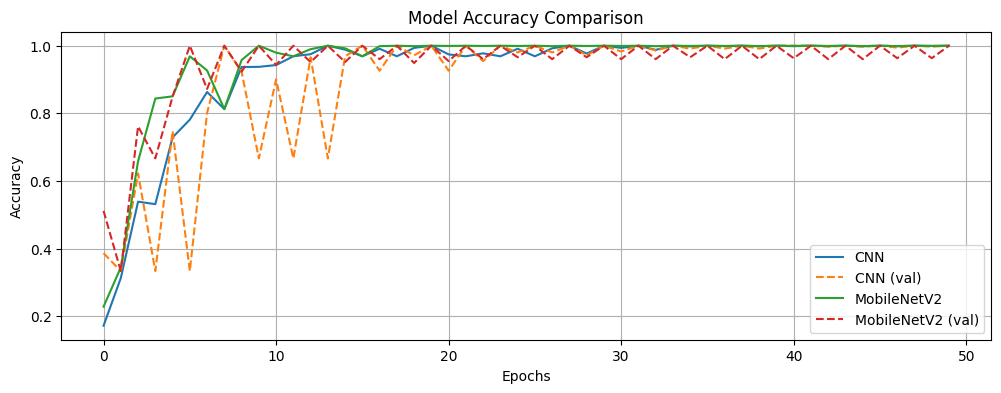

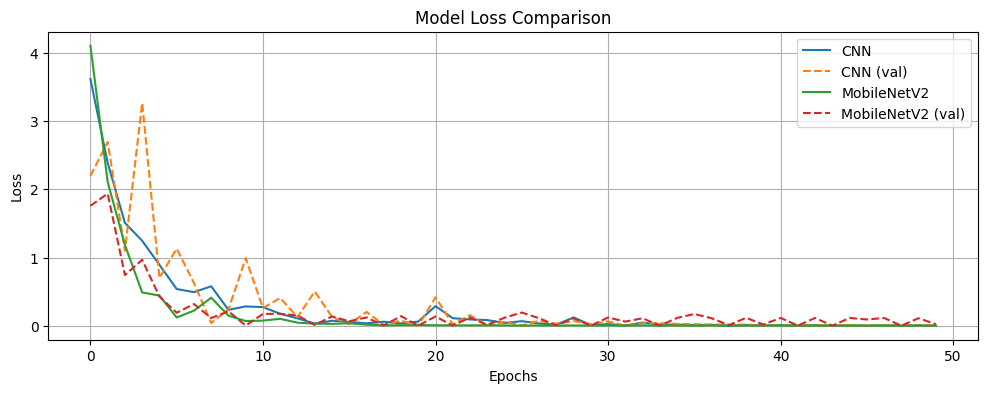

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 4))
    
    for name, history in histories.items():
        plt.plot(history.history[key], label=name)
        plt.plot(history.history['val_' + key], linestyle='--', label=name + ' (val)')
    
    plt.title(f'Model {key.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid()
    plt.show()

# Collect histories
histories = {
    'CNN': history,  
    'MobileNetV2': history_mobilenet
}

# Plot accuracy comparison
plot_history(histories, key='accuracy')

# Plot loss comparison
plot_history(histories, key='loss')


## Make Predictions with Each Model

In [ ]:
y_true = validation_generator.classes

# Predictions from CNN
y_pred_cnn = model.predict(validation_generator)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)  # Get predicted classes

# Predictions from MobileNetV2
y_pred_mobilenet = model_mobilenet.predict(validation_generator)
y_pred_classes_mobilenet = np.argmax(y_pred_mobilenet, axis=1)  # Get predicted classes


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 544ms/step


In [ ]:
from sklearn.metrics import classification_report

# Classification report for CNN
report_cnn = classification_report(y_true, y_pred_classes_cnn)
print("Classification Report - CNN:\n", report_cnn)

# Classification report for MobileNetV2
report_mobilenet = classification_report(y_true, y_pred_classes_mobilenet)
print("Classification Report - MobileNetV2:\n", report_mobilenet)


Classification Report - CNN:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.25      0.25      0.25         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        